5個變量的VAR(8)模型

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import kpss, adfuller, ccf, ccovf
from statsmodels.iolib.smpickle import load_pickle

In [49]:
horizon = pd.read_csv(".\\data\\horizon_multivariate_final.csv", encoding="utf-8")
horizon_diff = horizon.diff().dropna()
print(horizon.shape)
horizon.head()

(3193, 5)


Average Effective Clock  CPU Overall Power Consumption  GPU Power  \
0                   2295.4                         99.895    305.353   
1                   2598.2                        104.135    341.418   
2                   2741.5                        107.012    345.209   
3                   2660.6                        105.918    342.610   
4                   2598.3                        103.853    345.456   

   GPU Effective Clock  FPS  
0               1950.3  113  
1               1941.3  146  
2               1948.2  147  
3               1937.2  150  
4               1936.8  152

In [3]:
horizon_diff_train = horizon_diff[:-300]
horizon_diff_test = horizon_diff[-300:]

## VAR DIFF

In [4]:
var = VAR(horizon_diff_train)
var_order_result = var.select_order(12)

e:\Master\Time Series\TimeSeries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [5]:
var_order_result.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [6]:
ic_table = pd.read_html(var_order_result.summary().as_html(), header=0, index_col=0)
ic_table[0] = ic_table[0].replace("\*$", "", regex=True)
ic_table[0] = ic_table[0].astype("float64")

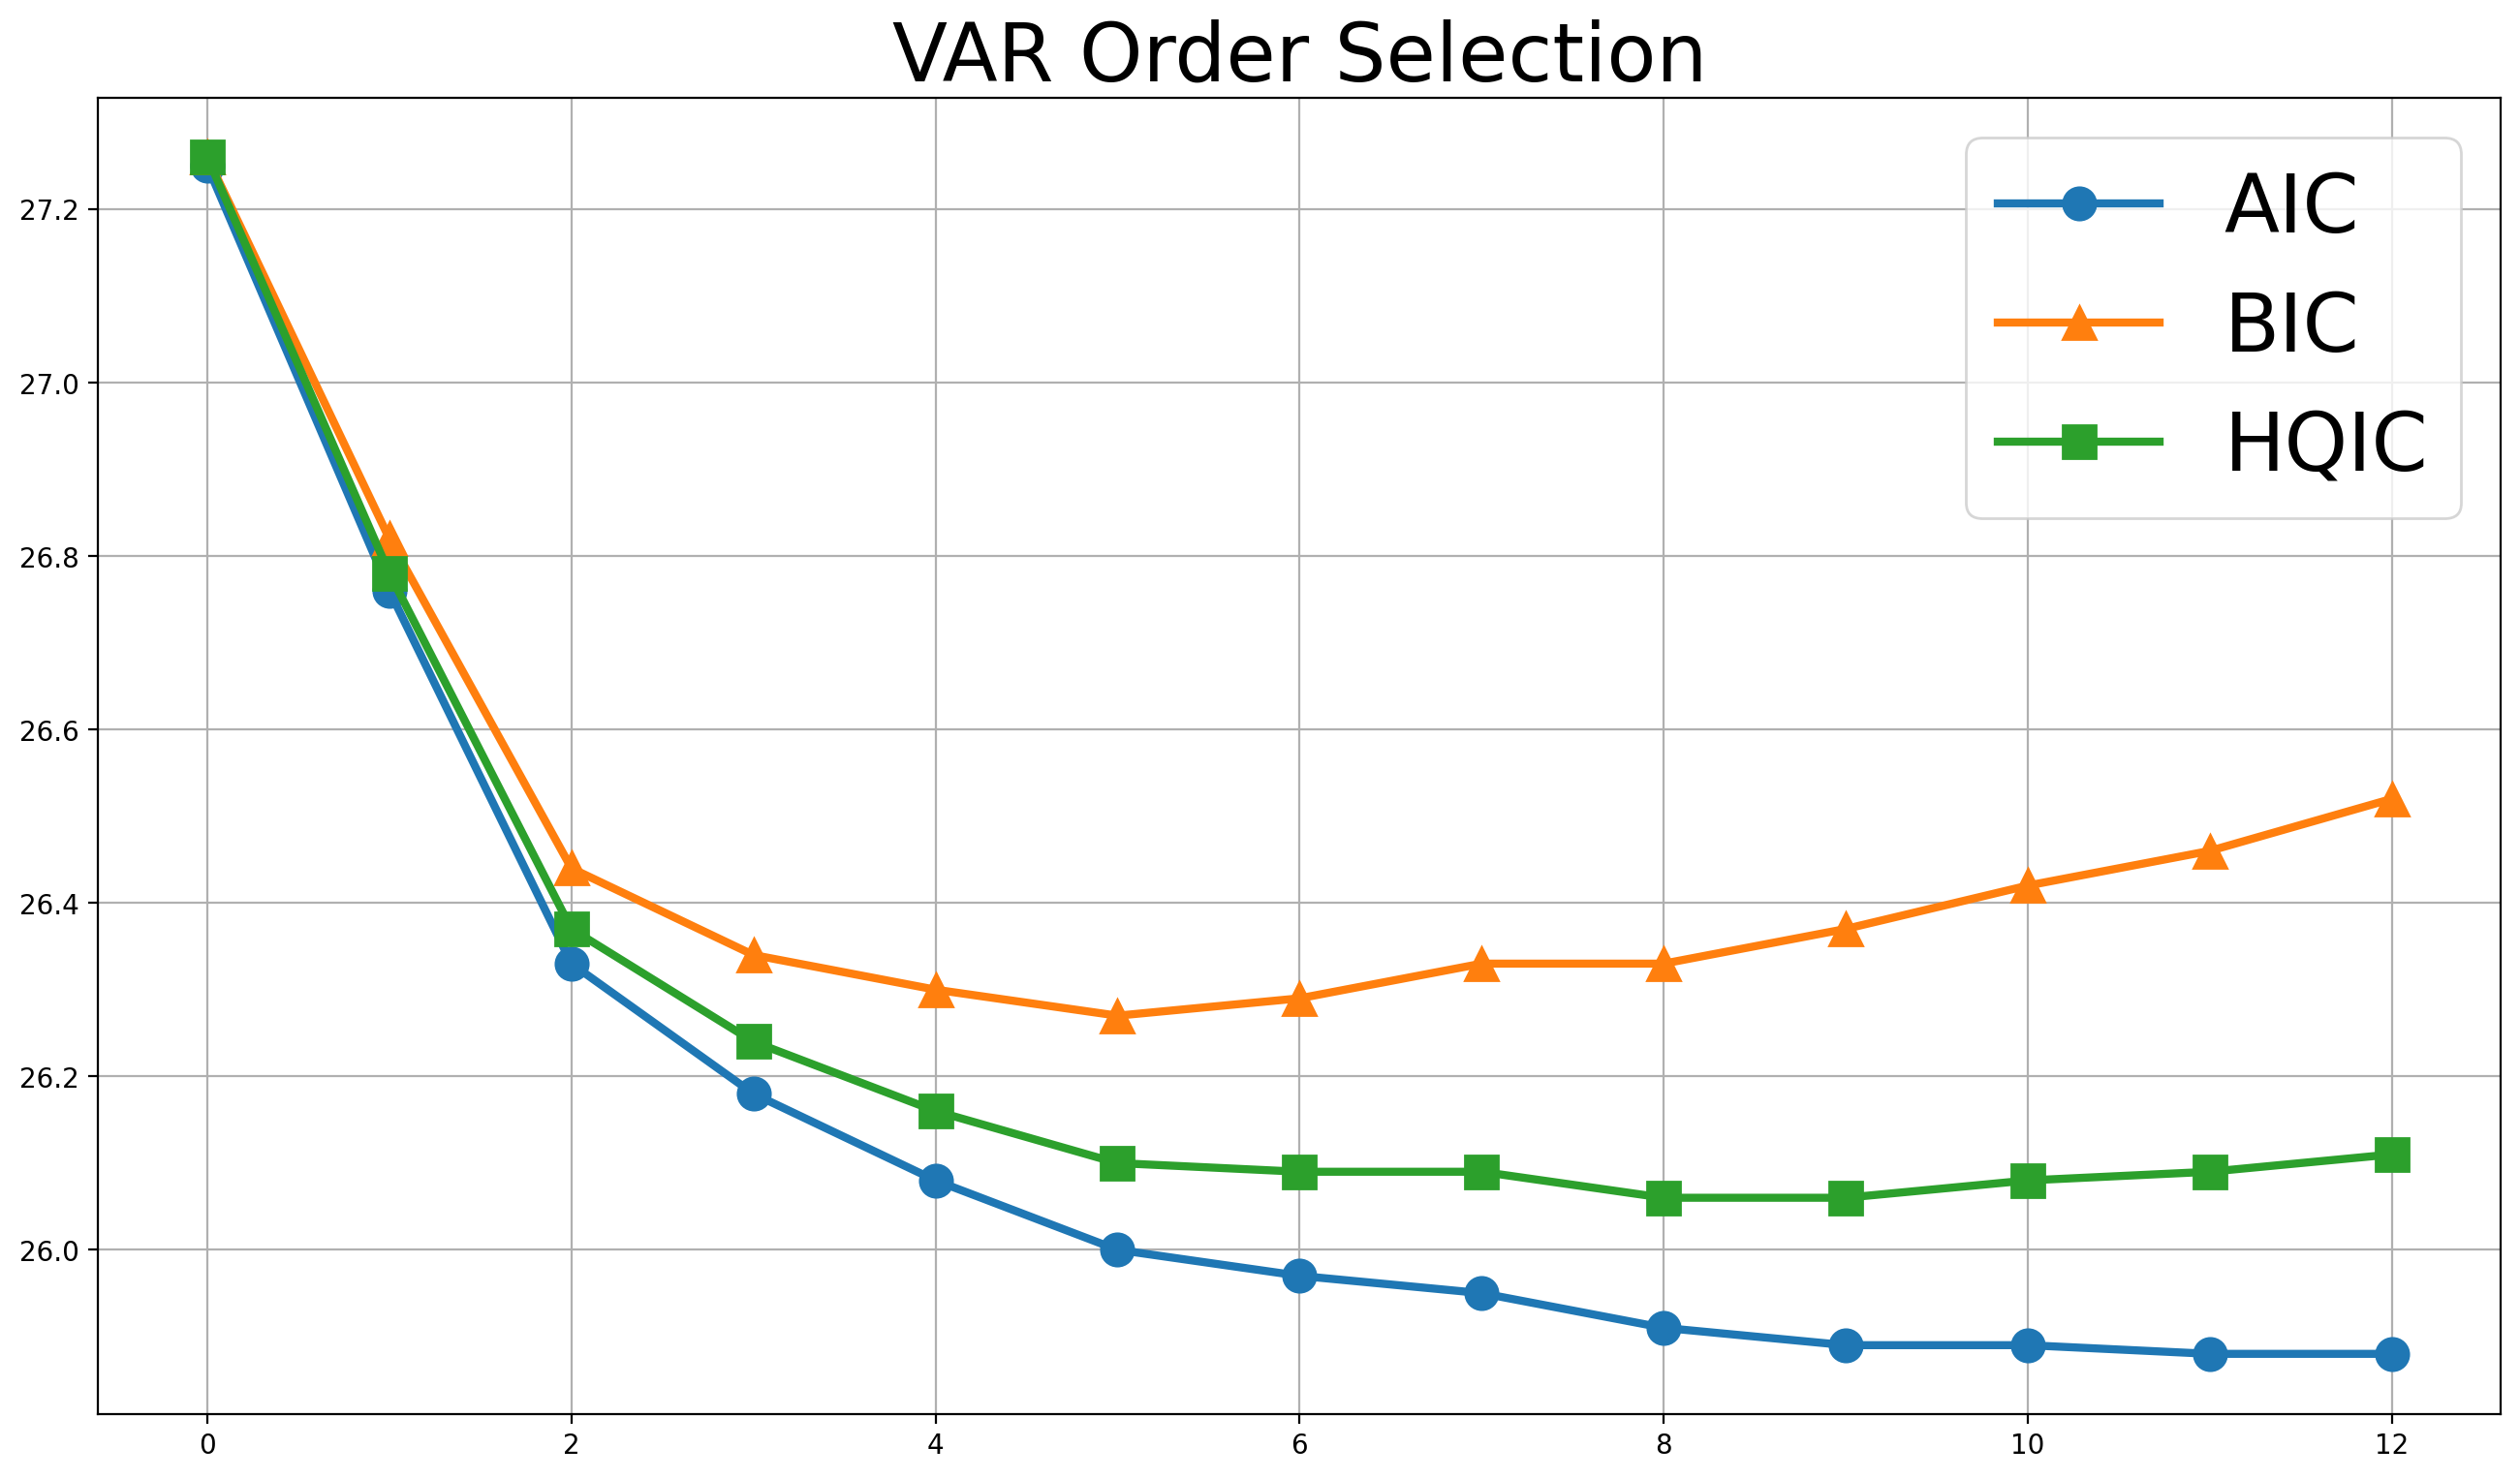

In [7]:
plt.figure(figsize=(16,9), dpi=200)
aic, = plt.plot(ic_table[0]["AIC"], "-o", linewidth=3, ms=12, label="AIC")
bic, = plt.plot(ic_table[0]["BIC"], "-^", linewidth=3, ms=12, label="BIC")
hqic, = plt.plot(ic_table[0]["HQIC"], "-s", linewidth=3, ms=12, label="HQIC")
plt.legend(handles=[aic, bic, hqic], fontsize=30)
plt.title("VAR Order Selection", fontdict={'fontsize':30})
plt.grid()
plt.show()

In [8]:
var_result = var.fit(5)

In [9]:
var_result.llf

-57889.47487604025

In [10]:
var_result.info_criteria

{'aic': 26.004223865071562,
 'bic': 26.27295836917831,
 'hqic': 26.101075905289893,
 'fpe': 196558571958.16278}

In [11]:
var_result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 10, Jun, 2022
Time:                     23:06:46
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    26.2730
Nobs:                     2887.00    HQIC:                   26.1011
Log likelihood:          -57889.5    FPE:                1.96559e+11
AIC:                      26.0042    Det(Omega_mle):     1.87942e+11
--------------------------------------------------------------------
Results for equation Average Effective Clock
                                      coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------
const                                    0.616450         2.193607            0.281           0.779
L1.Average Effective Clock              -0.159938         0.058993

In [12]:
irf_var = var_result.irf(periods=10)

In [13]:
print(len(irf_var.G))
print(irf_var.G[0].shape)

10
(25, 125)


In [14]:
print(irf_var.H.shape)

(25, 15)


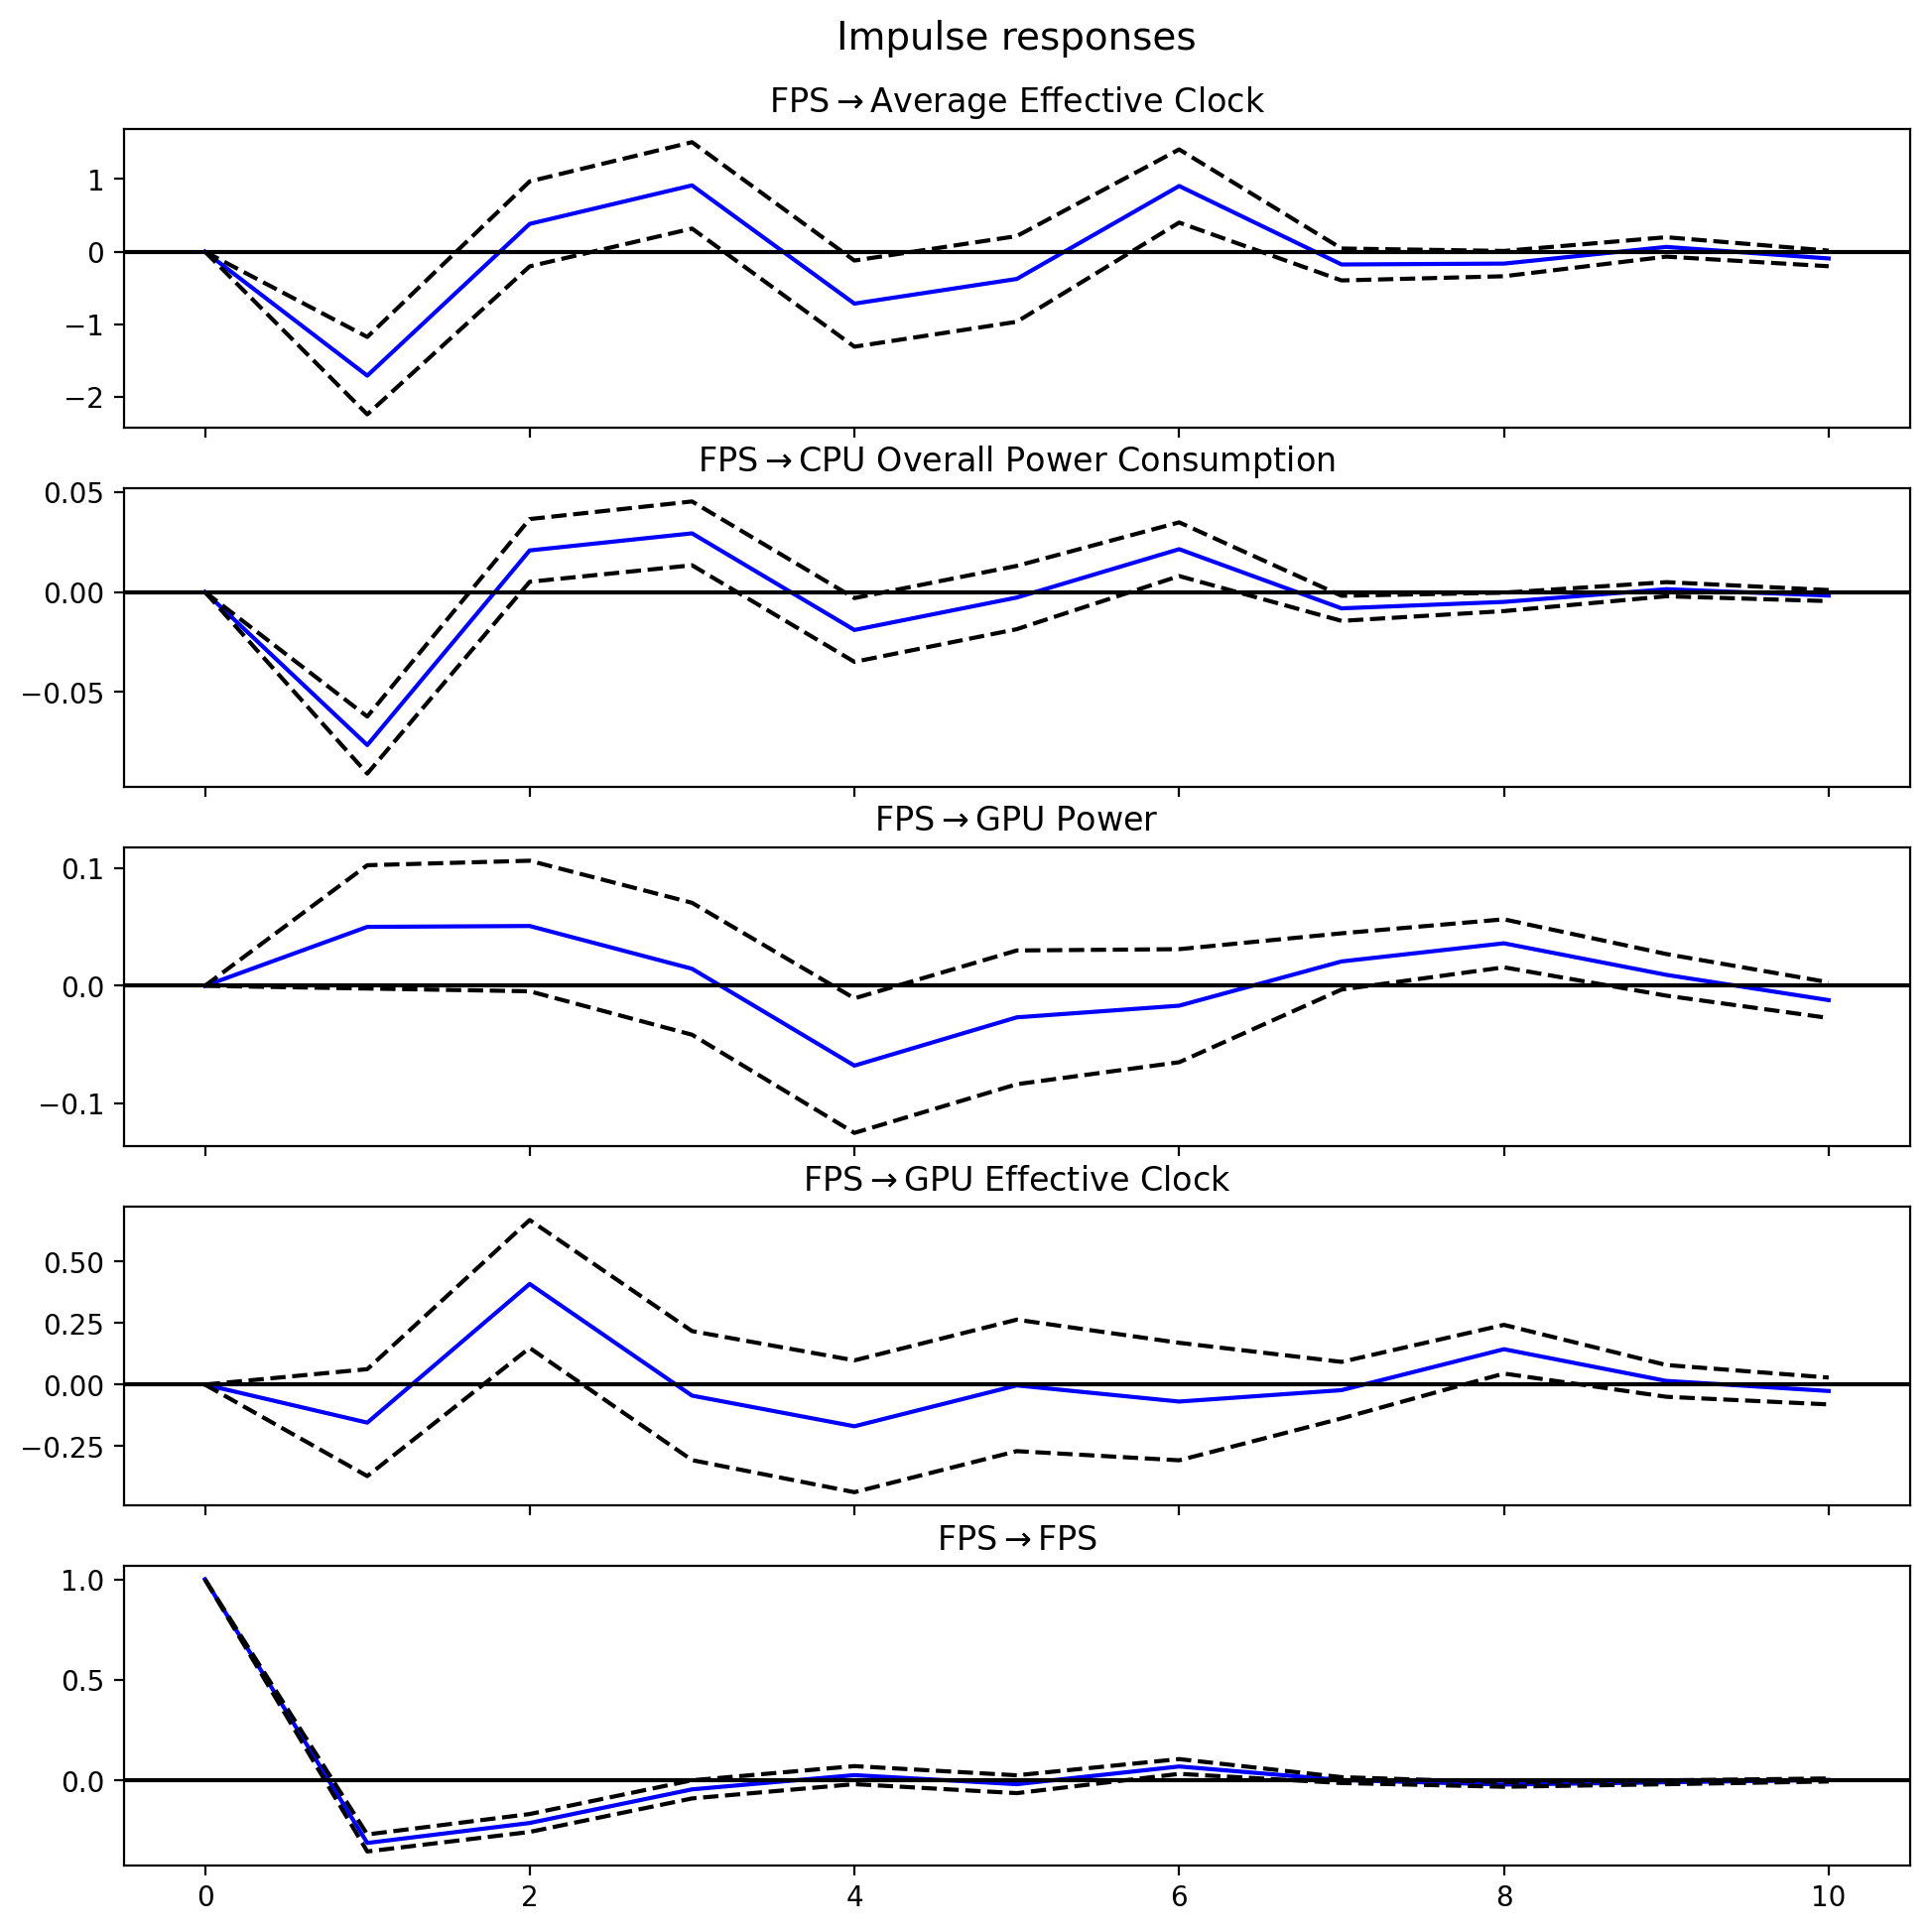

In [15]:
irf_var.plot(impulse="FPS")
plt.show()

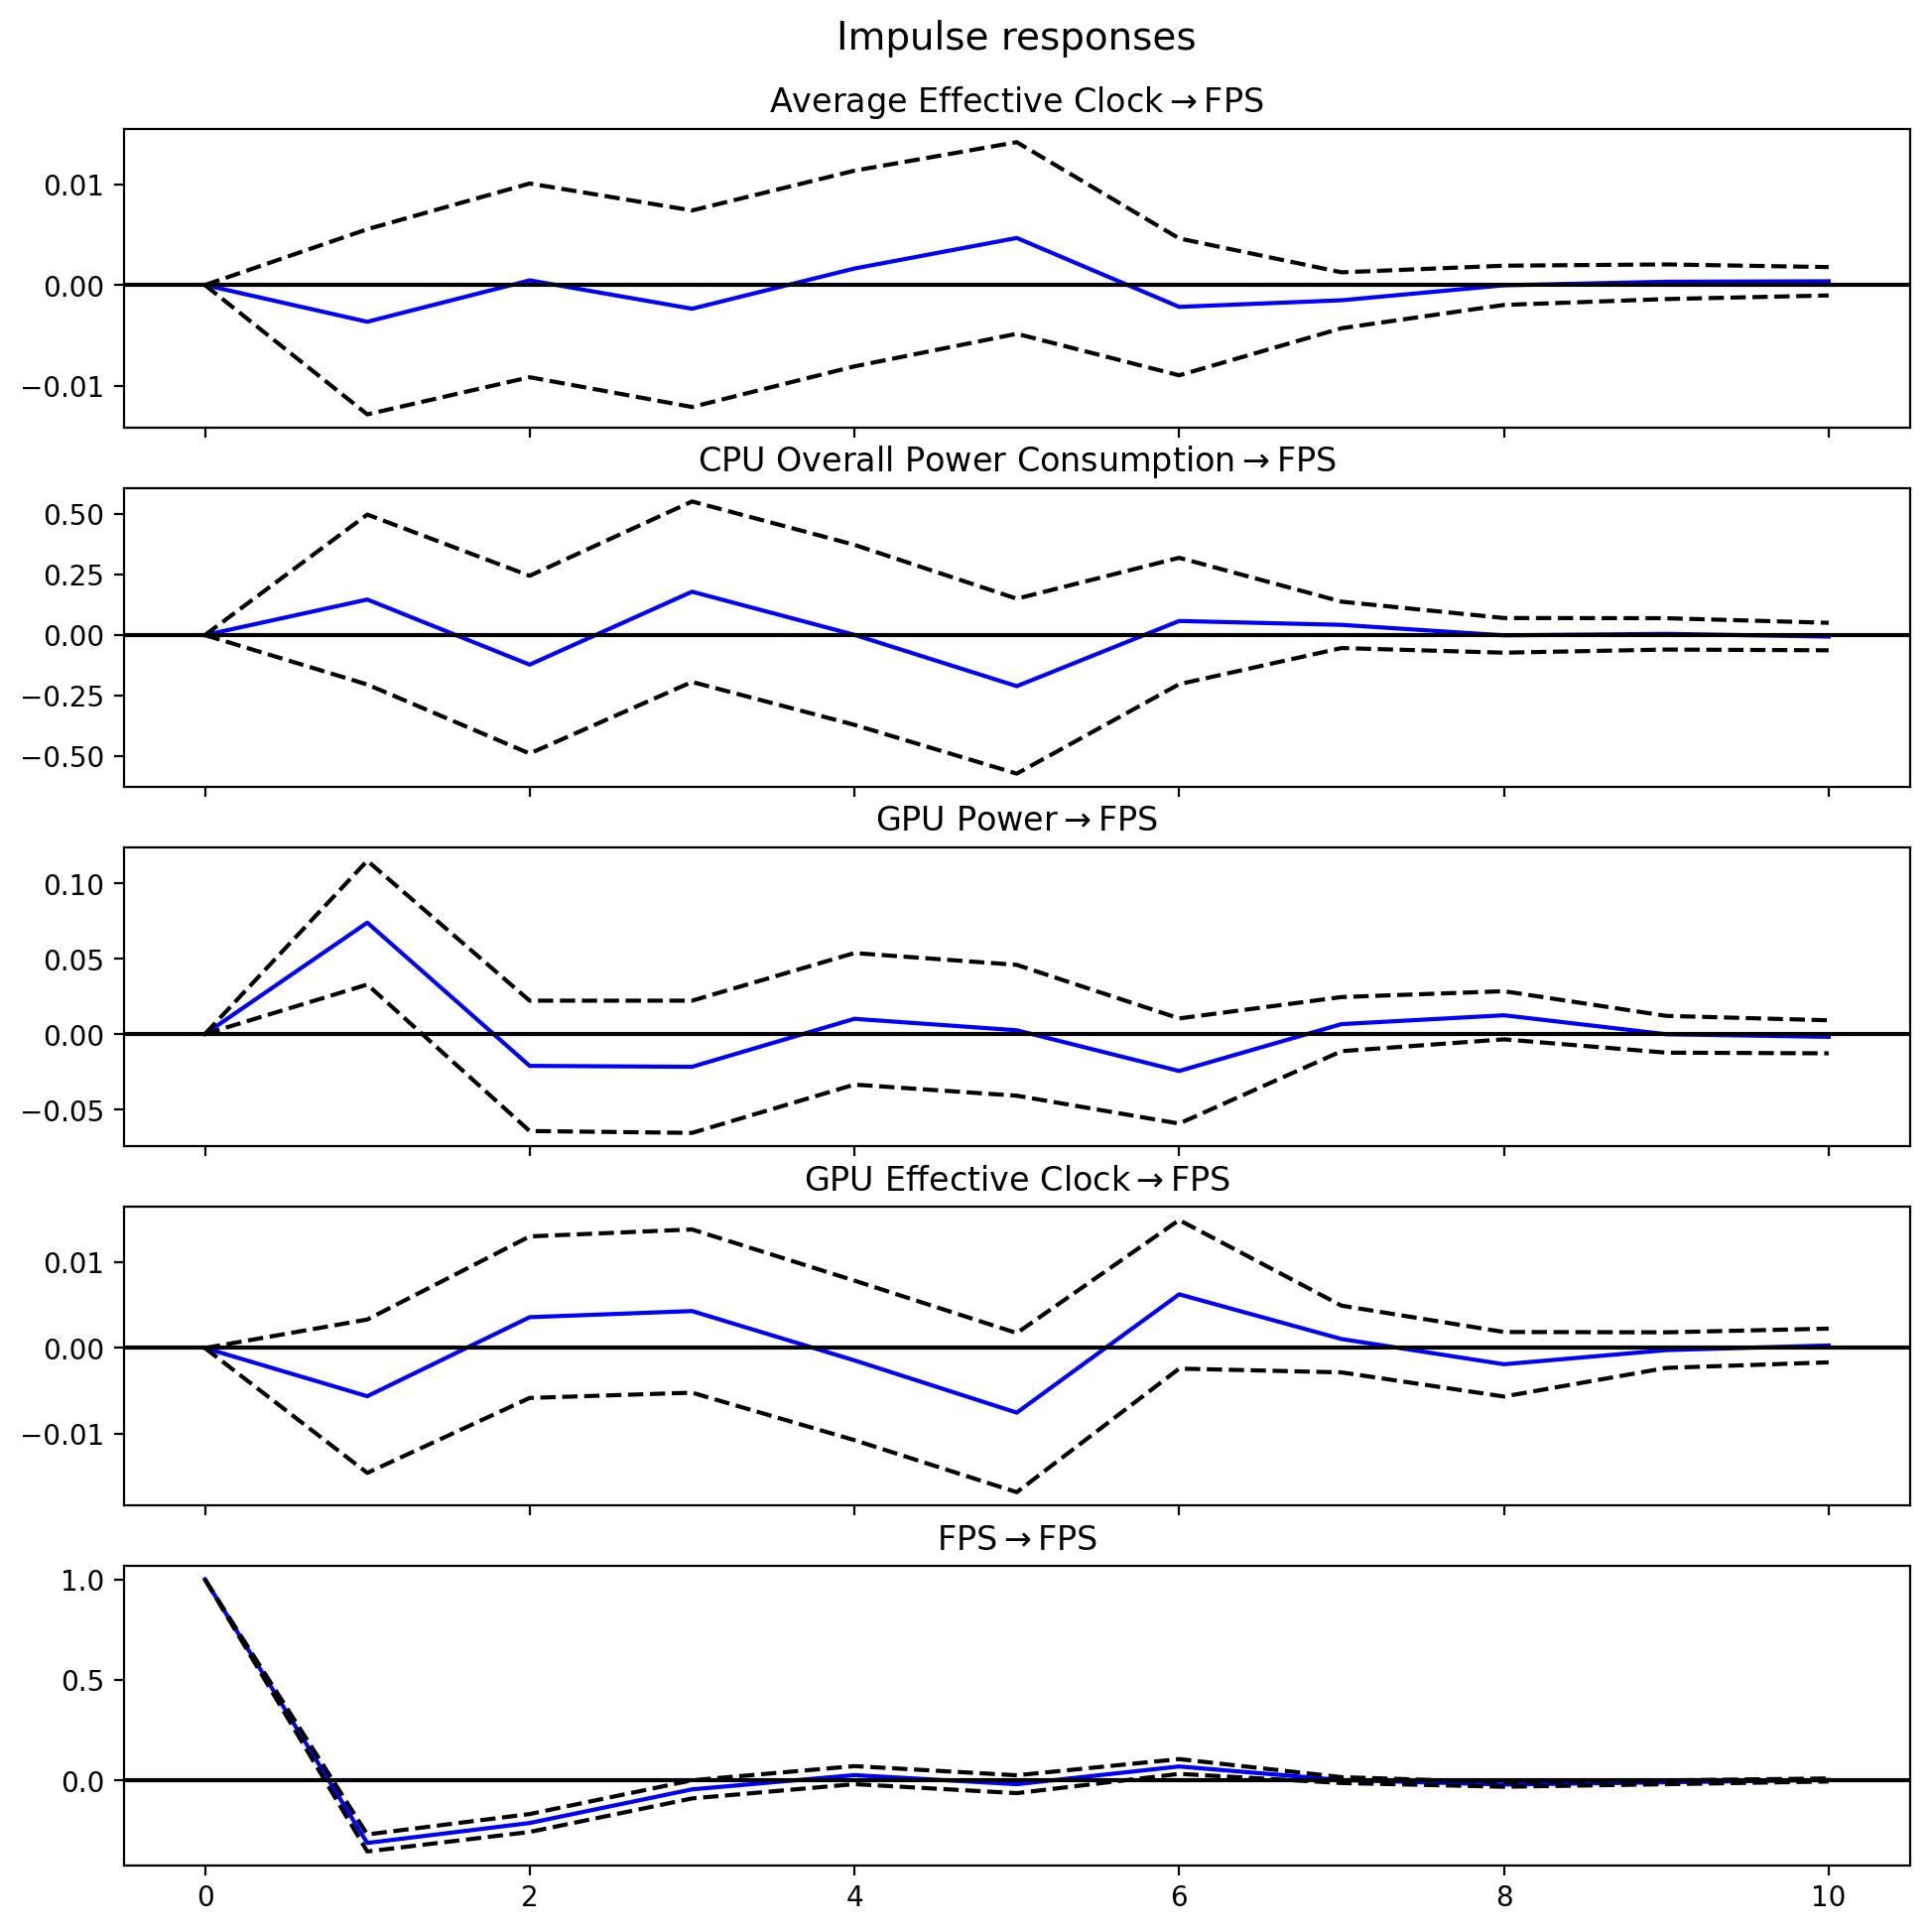

In [16]:
irf_var.plot(response="FPS")
plt.show()

Portmanteau Test

In [17]:
var_result.test_whiteness().summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Jarque-Bera Test

In [18]:
var_result.test_normality().summary()

<class 'statsmodels.iolib.table.SimpleTable'>

格蘭傑因果關係檢定

In [19]:
var_result.test_causality(
    "FPS",
    ["Average Effective Clock", "CPU Overall Power Consumption",
     "GPU Power", "GPU Effective Clock"],
    kind='f'
).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [20]:
var_result.test_causality(
    "FPS",
    ["Average Effective Clock", "GPU Effective Clock"],
    # ["CPU Overall Power Consumption", "Average Effective Clock"],
    # ["GPU Power", "GPU Effective Clock"],
    kind='f'
).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [21]:
var_result.test_causality(
    "FPS",
    ["CPU Overall Power Consumption", "GPU Power"],
    kind='f'
).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

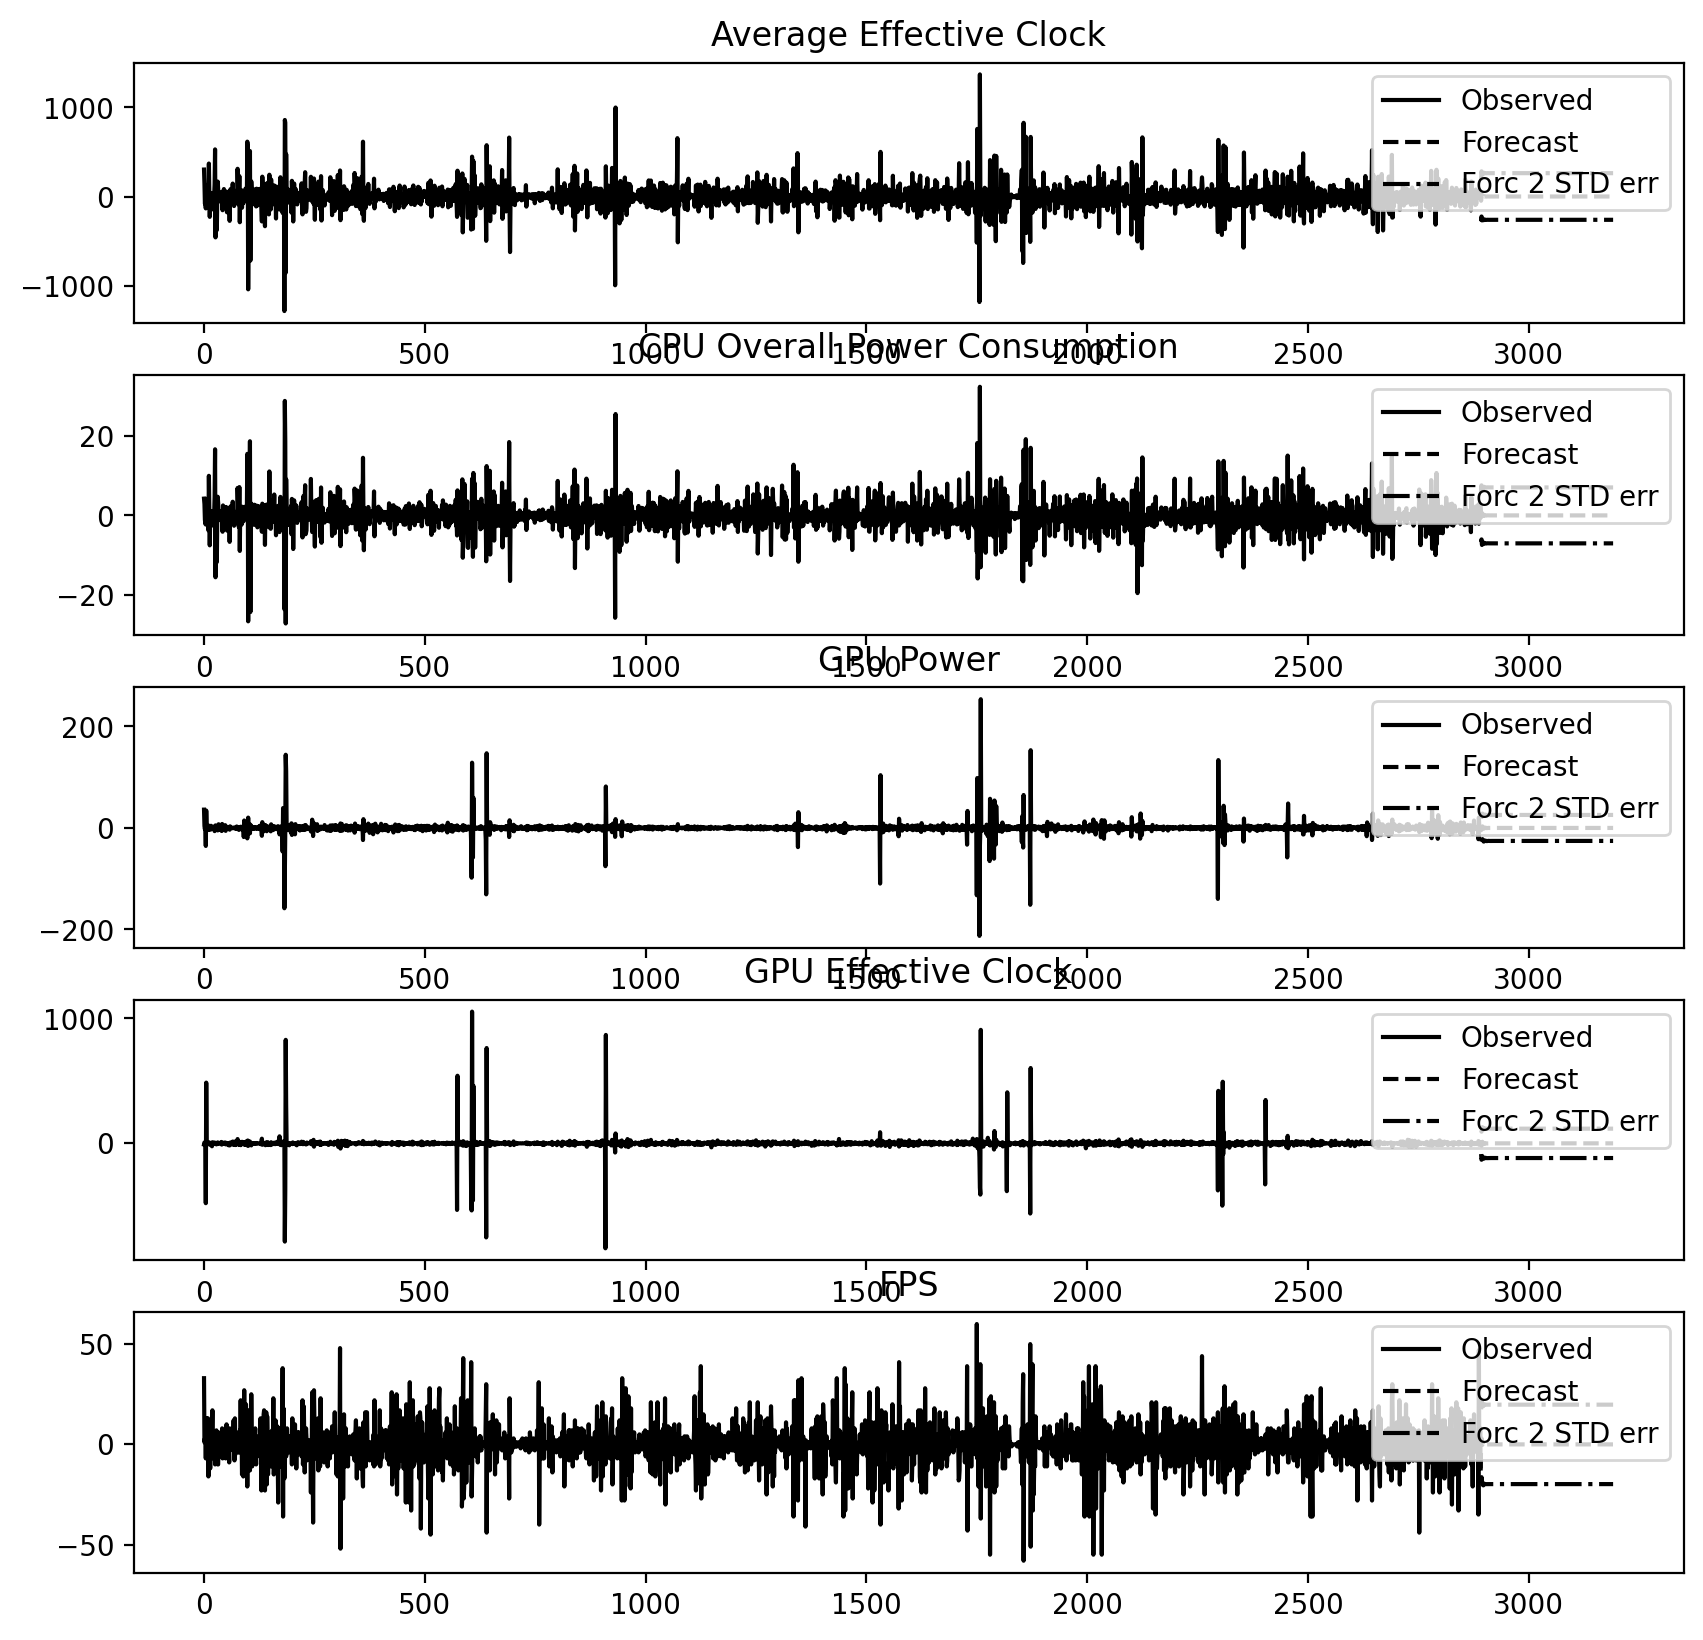

In [22]:
fig = var_result.plot_forecast(steps=300)
fig.dpi = 200
plt.show()

### VARMAX DIFF

In [23]:
# model_result50 = VARMAX(horizon_diff_train, order=(5, 0)).fit()
# model_result50.save(f".\\weights\\VAR DIFF 5\\VAR_result_50.pickle")

In [24]:
varmax_result = load_pickle(".\\weights\\VAR DIFF 5\\VAR_result_50.pickle")
# varmax.summary()

In [25]:
varmax_result.llf

-58067.98302588045

In [26]:
varmax_result.impulse_responses(impulse=4, orthogonalized=False, steps=10)

Average Effective Clock  CPU Overall Power Consumption  GPU Power  \
0                  0.000000                       0.000000   0.000000   
1                 -1.674776                      -0.075482   0.048008   
2                  0.349578                       0.020070   0.047373   
3                  0.887586                       0.028490   0.016950   
4                 -0.720028                      -0.018979  -0.070847   
5                 -0.357984                      -0.002419  -0.022007   
6                  0.913288                       0.021630  -0.016935   
7                 -0.161300                      -0.007838   0.017871   
8                 -0.171182                      -0.005163   0.036838   
9                  0.050708                       0.000957   0.010421   
10                -0.102019                      -0.001932  -0.012566   

    GPU Effective Clock       FPS  
0              0.000000  1.000000  
1             -0.182133 -0.310412  
2              0.380415 -0.211000  
3             -0.037654 -0.044085  
4             -0.204588  0.024876  
5              0.075932 -0.018305  
6             -0.073595  0.070482  
7             -0.055805  0.002224  
8              0.147671 -0.019871  
9              0.019525 -0.008719  
10            -0.035727  0.001803

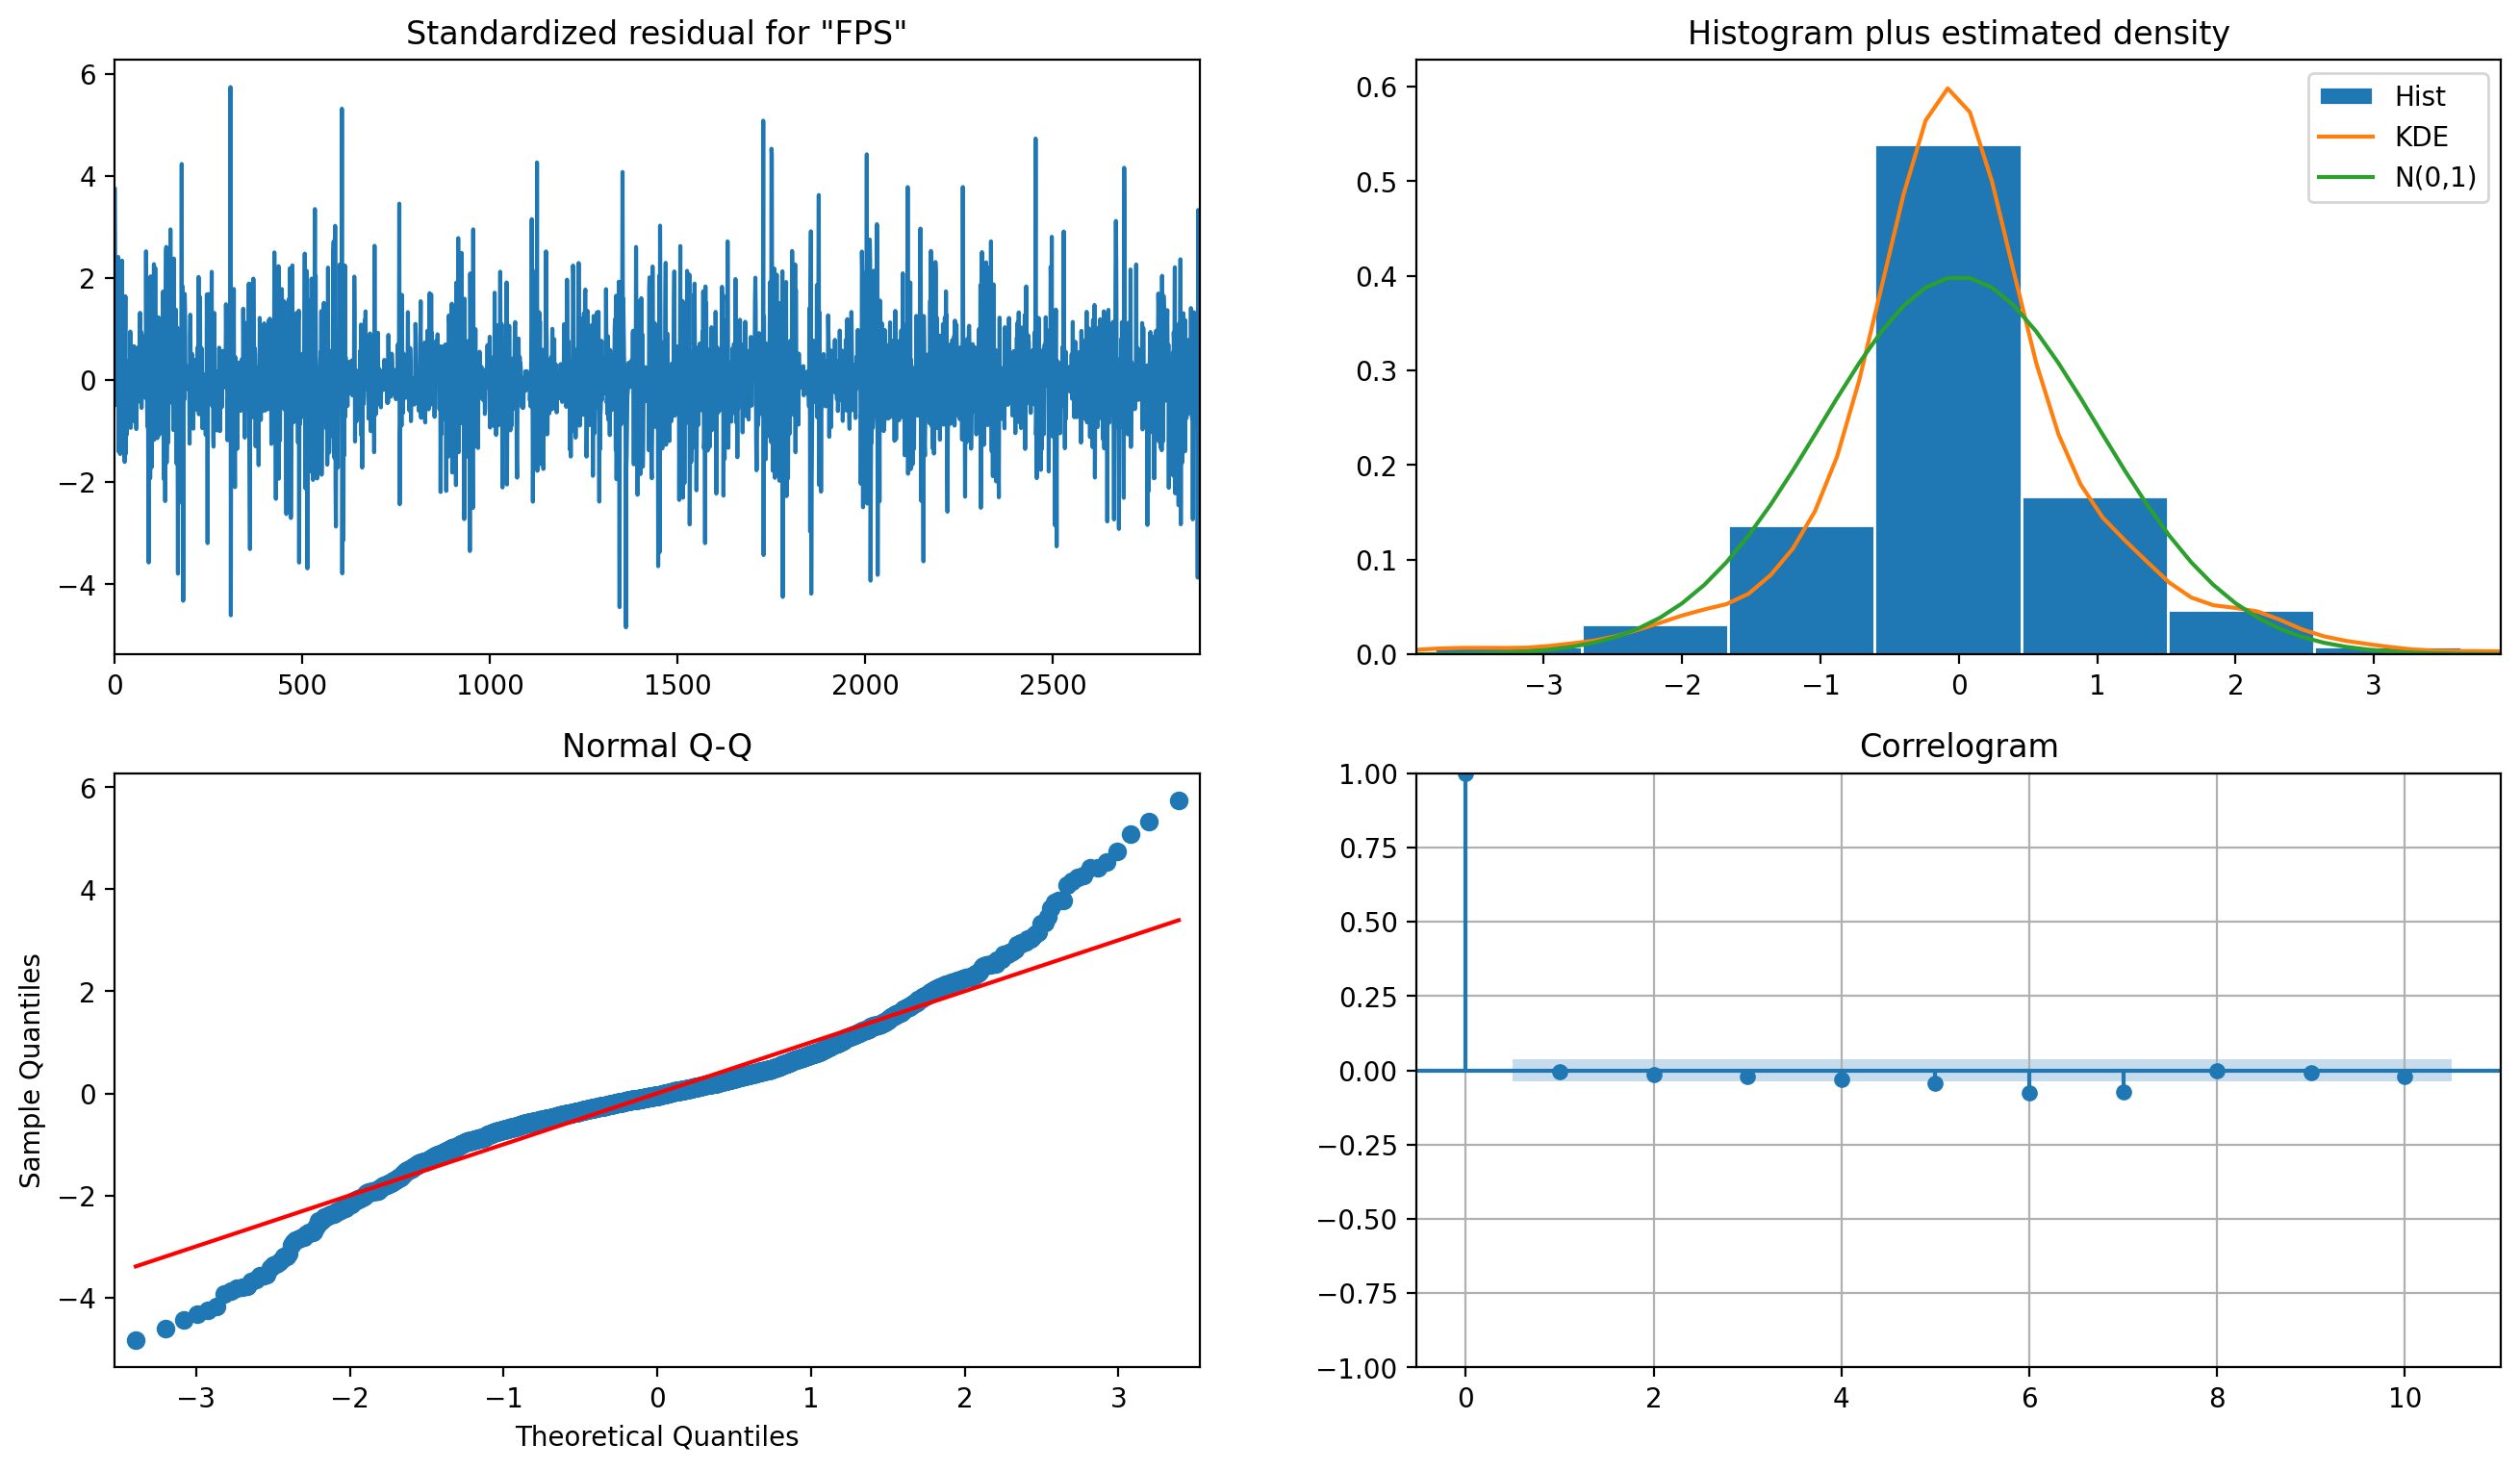

In [27]:
varmax_result.plot_diagnostics(variable=4, fig=plt.figure(figsize=(16,9), dpi=200))
plt.grid()
plt.show()

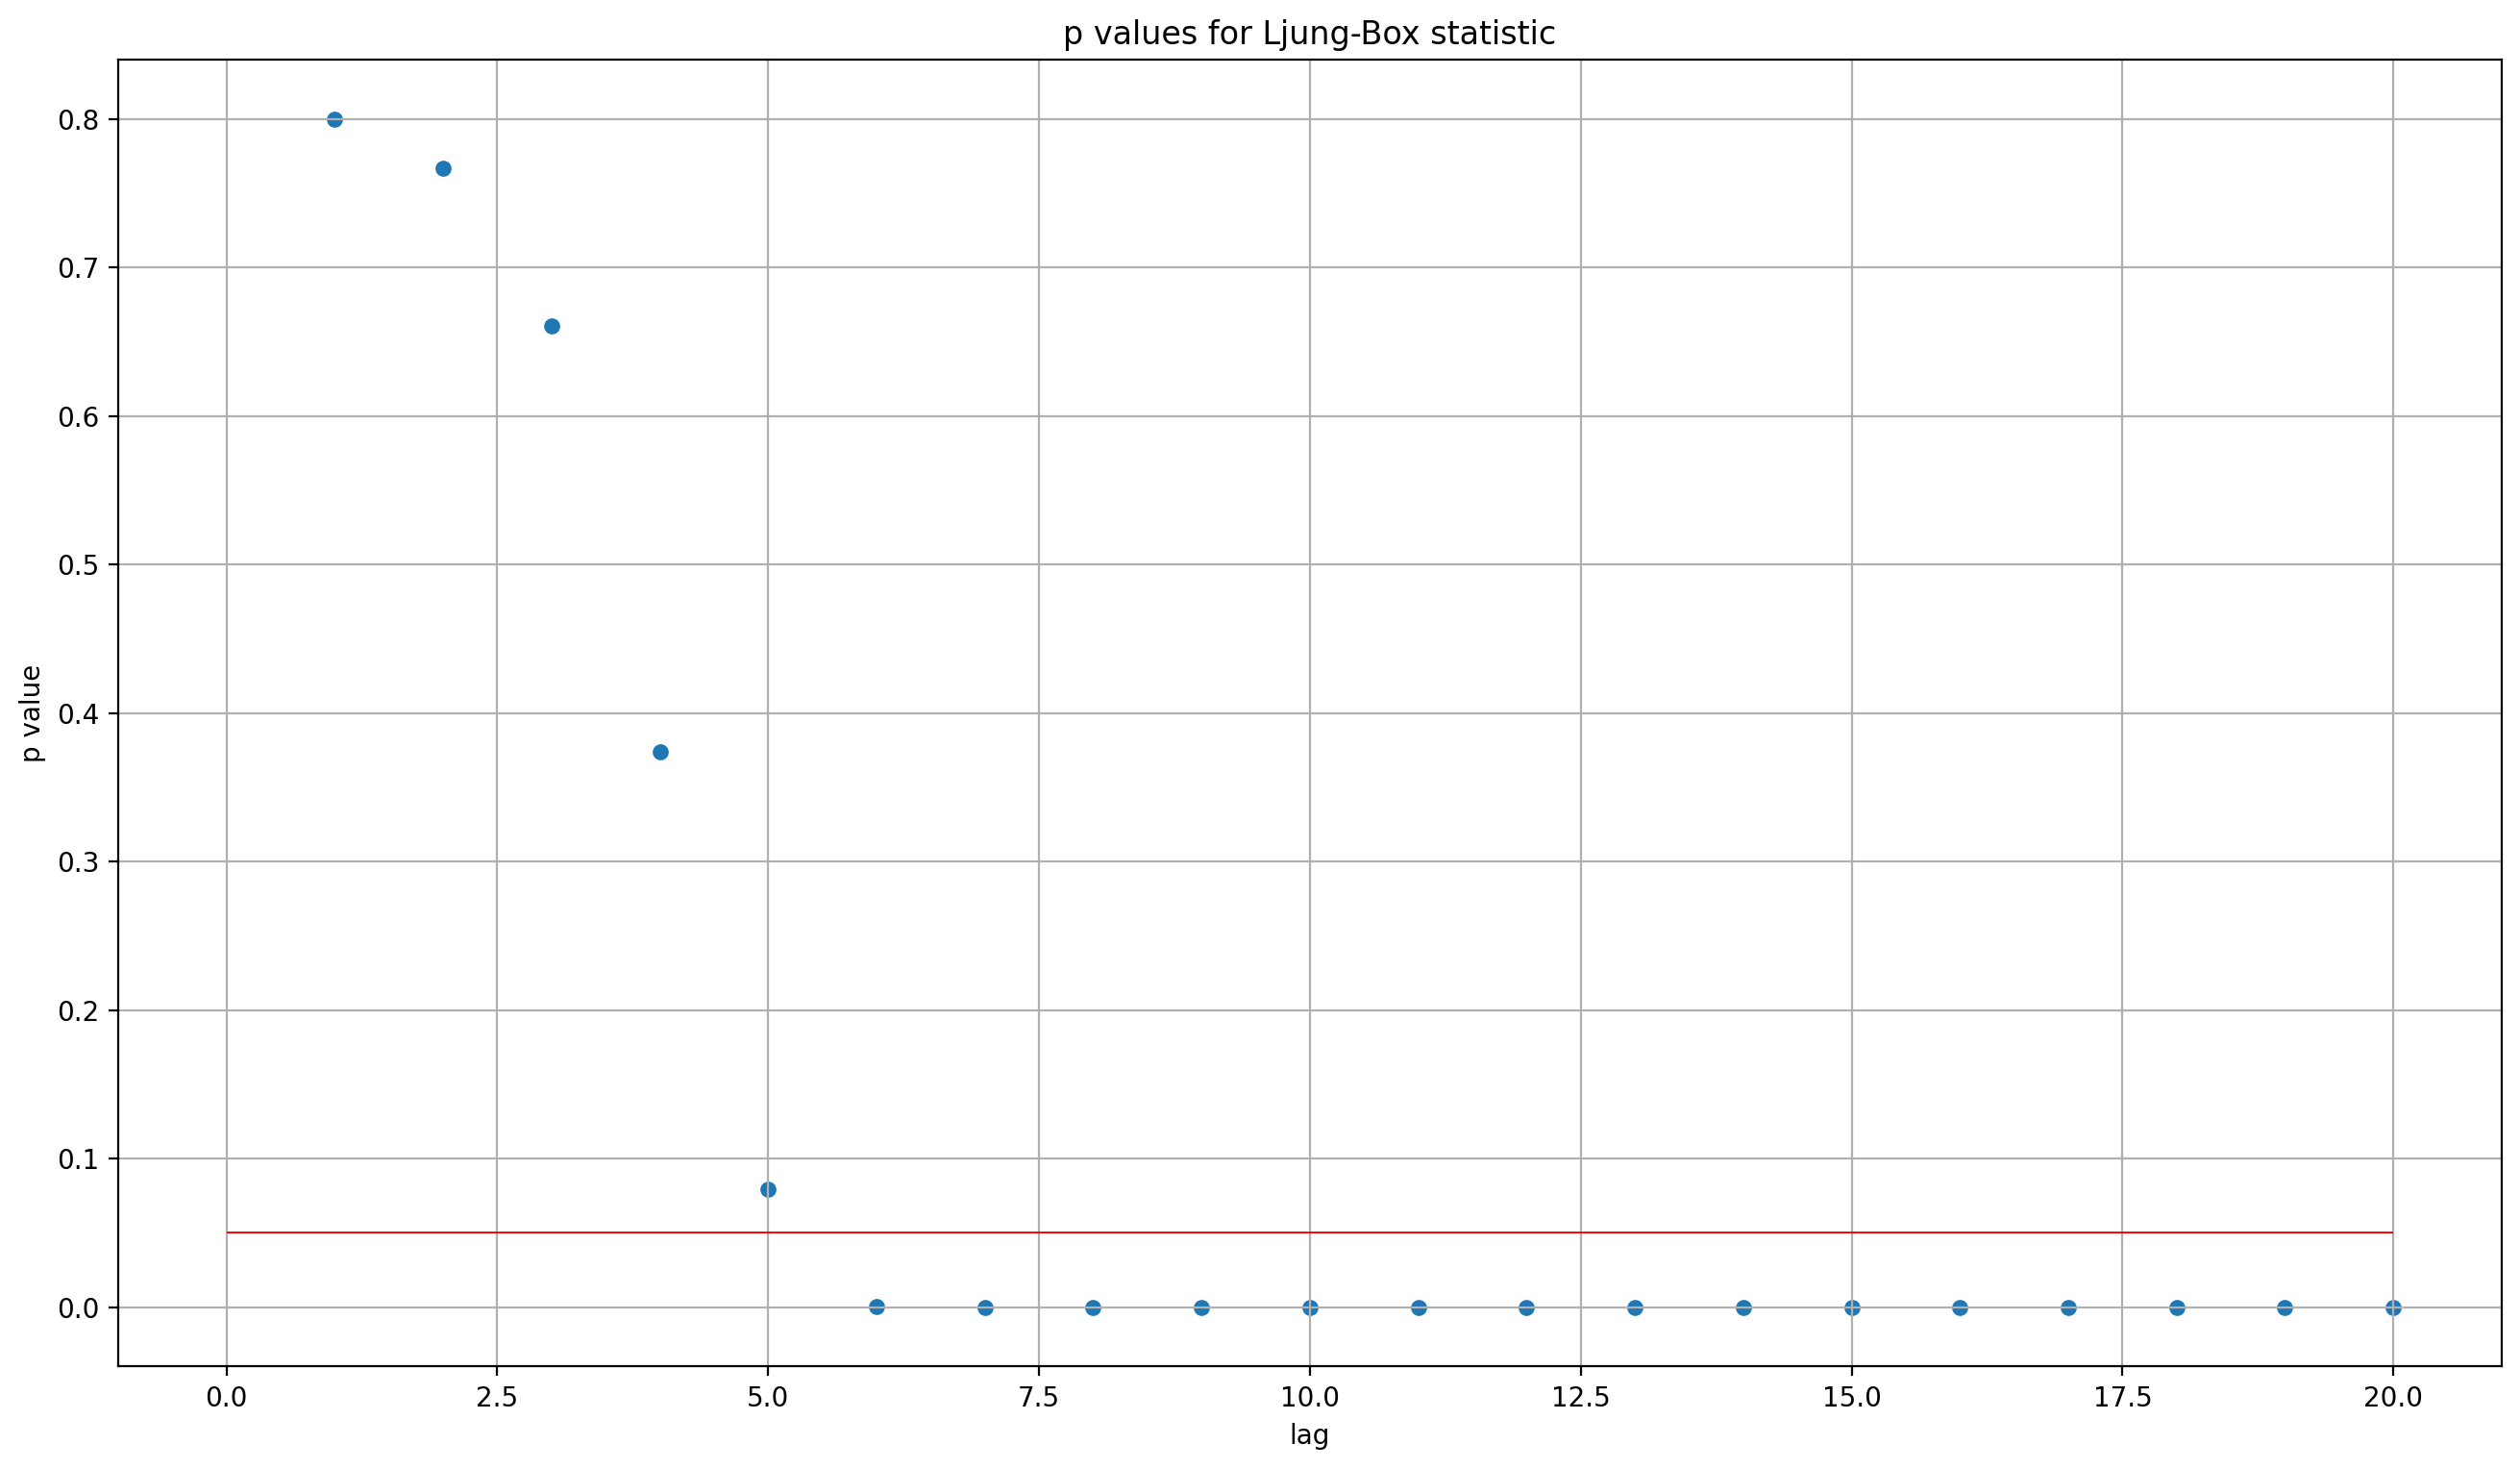

In [28]:
plt.figure(figsize=(16, 9), dpi=200)
plt.scatter(list(range(1,21)), varmax_result.test_serial_correlation(method="ljungbox", lags=20)[4, 1, :], s=25)
plt.hlines(y=[0.05], xmin=0, xmax=20, colors="r", linewidths=0.7)
plt.title("p values for Ljung-Box statistic")
plt.xlabel("lag")
plt.ylabel("p value")
plt.grid()
plt.show()

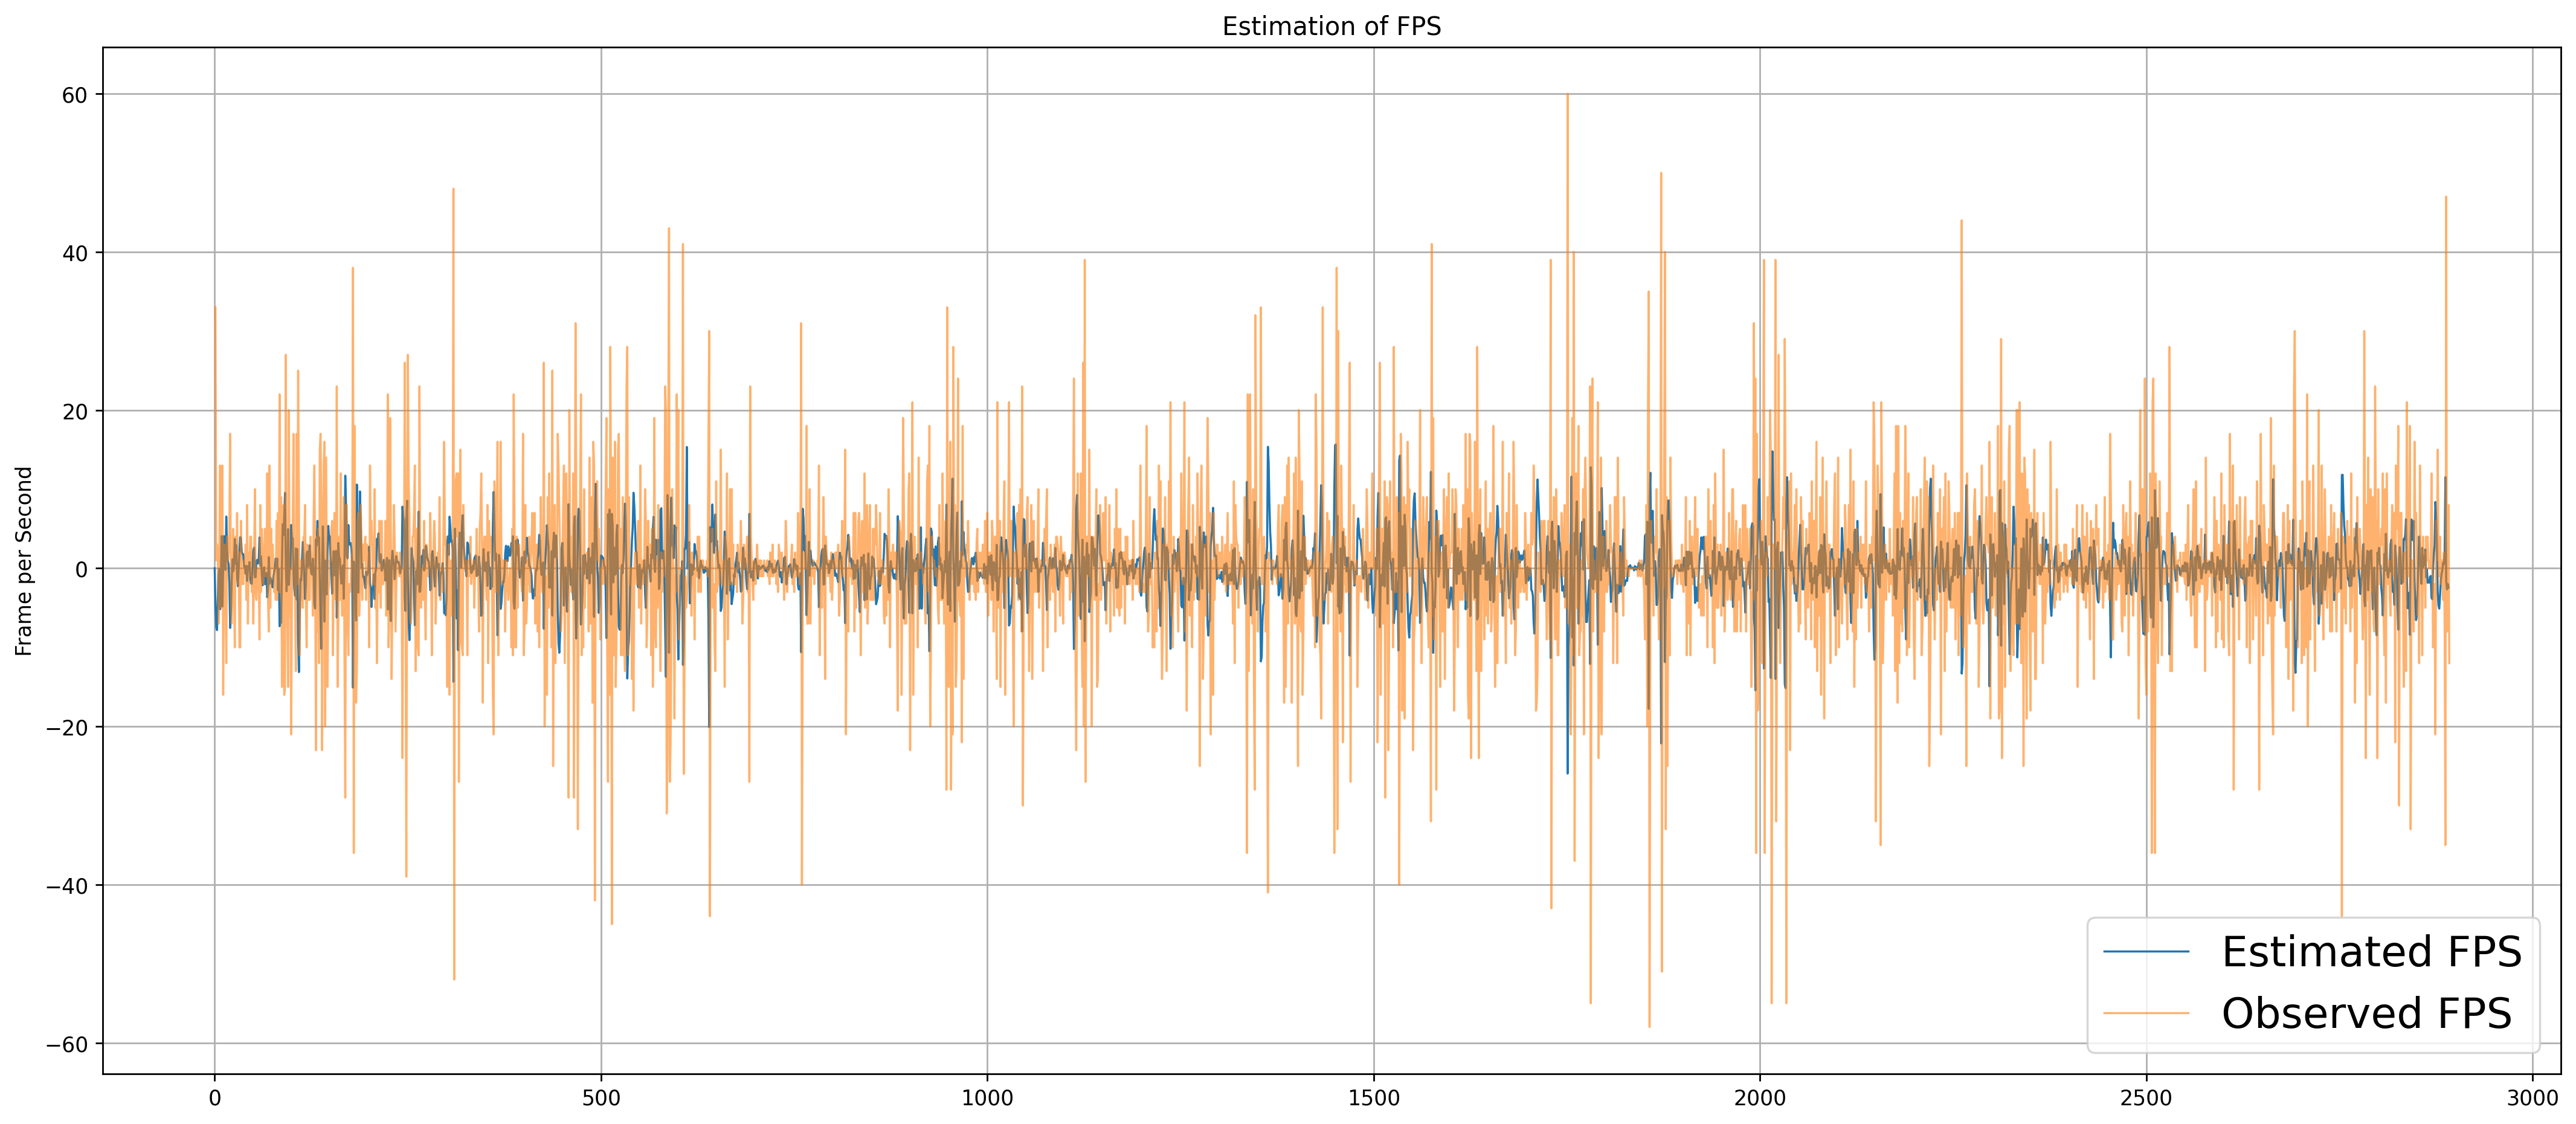

In [29]:
hat_FPS = varmax_result.predict().to_numpy()[:, 4]
plt.figure(figsize=(21, 9), dpi=250)
ts1, = plt.plot(hat_FPS, linewidth=1, label="Estimated FPS", c='tab:blue')
ts2, = plt.plot(horizon_diff_train["FPS"], linewidth=1, label="Observed FPS", c='tab:orange', alpha=0.6)
plt.legend(handles=[ts1, ts2], fontsize=20)
plt.title("Estimation of FPS")
plt.ylabel("Frame per Second")
plt.grid()
plt.show()

In [30]:
varmax_forecasting = varmax_result.get_forecast(steps=300)

e:\Master\Time Series\TimeSeries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


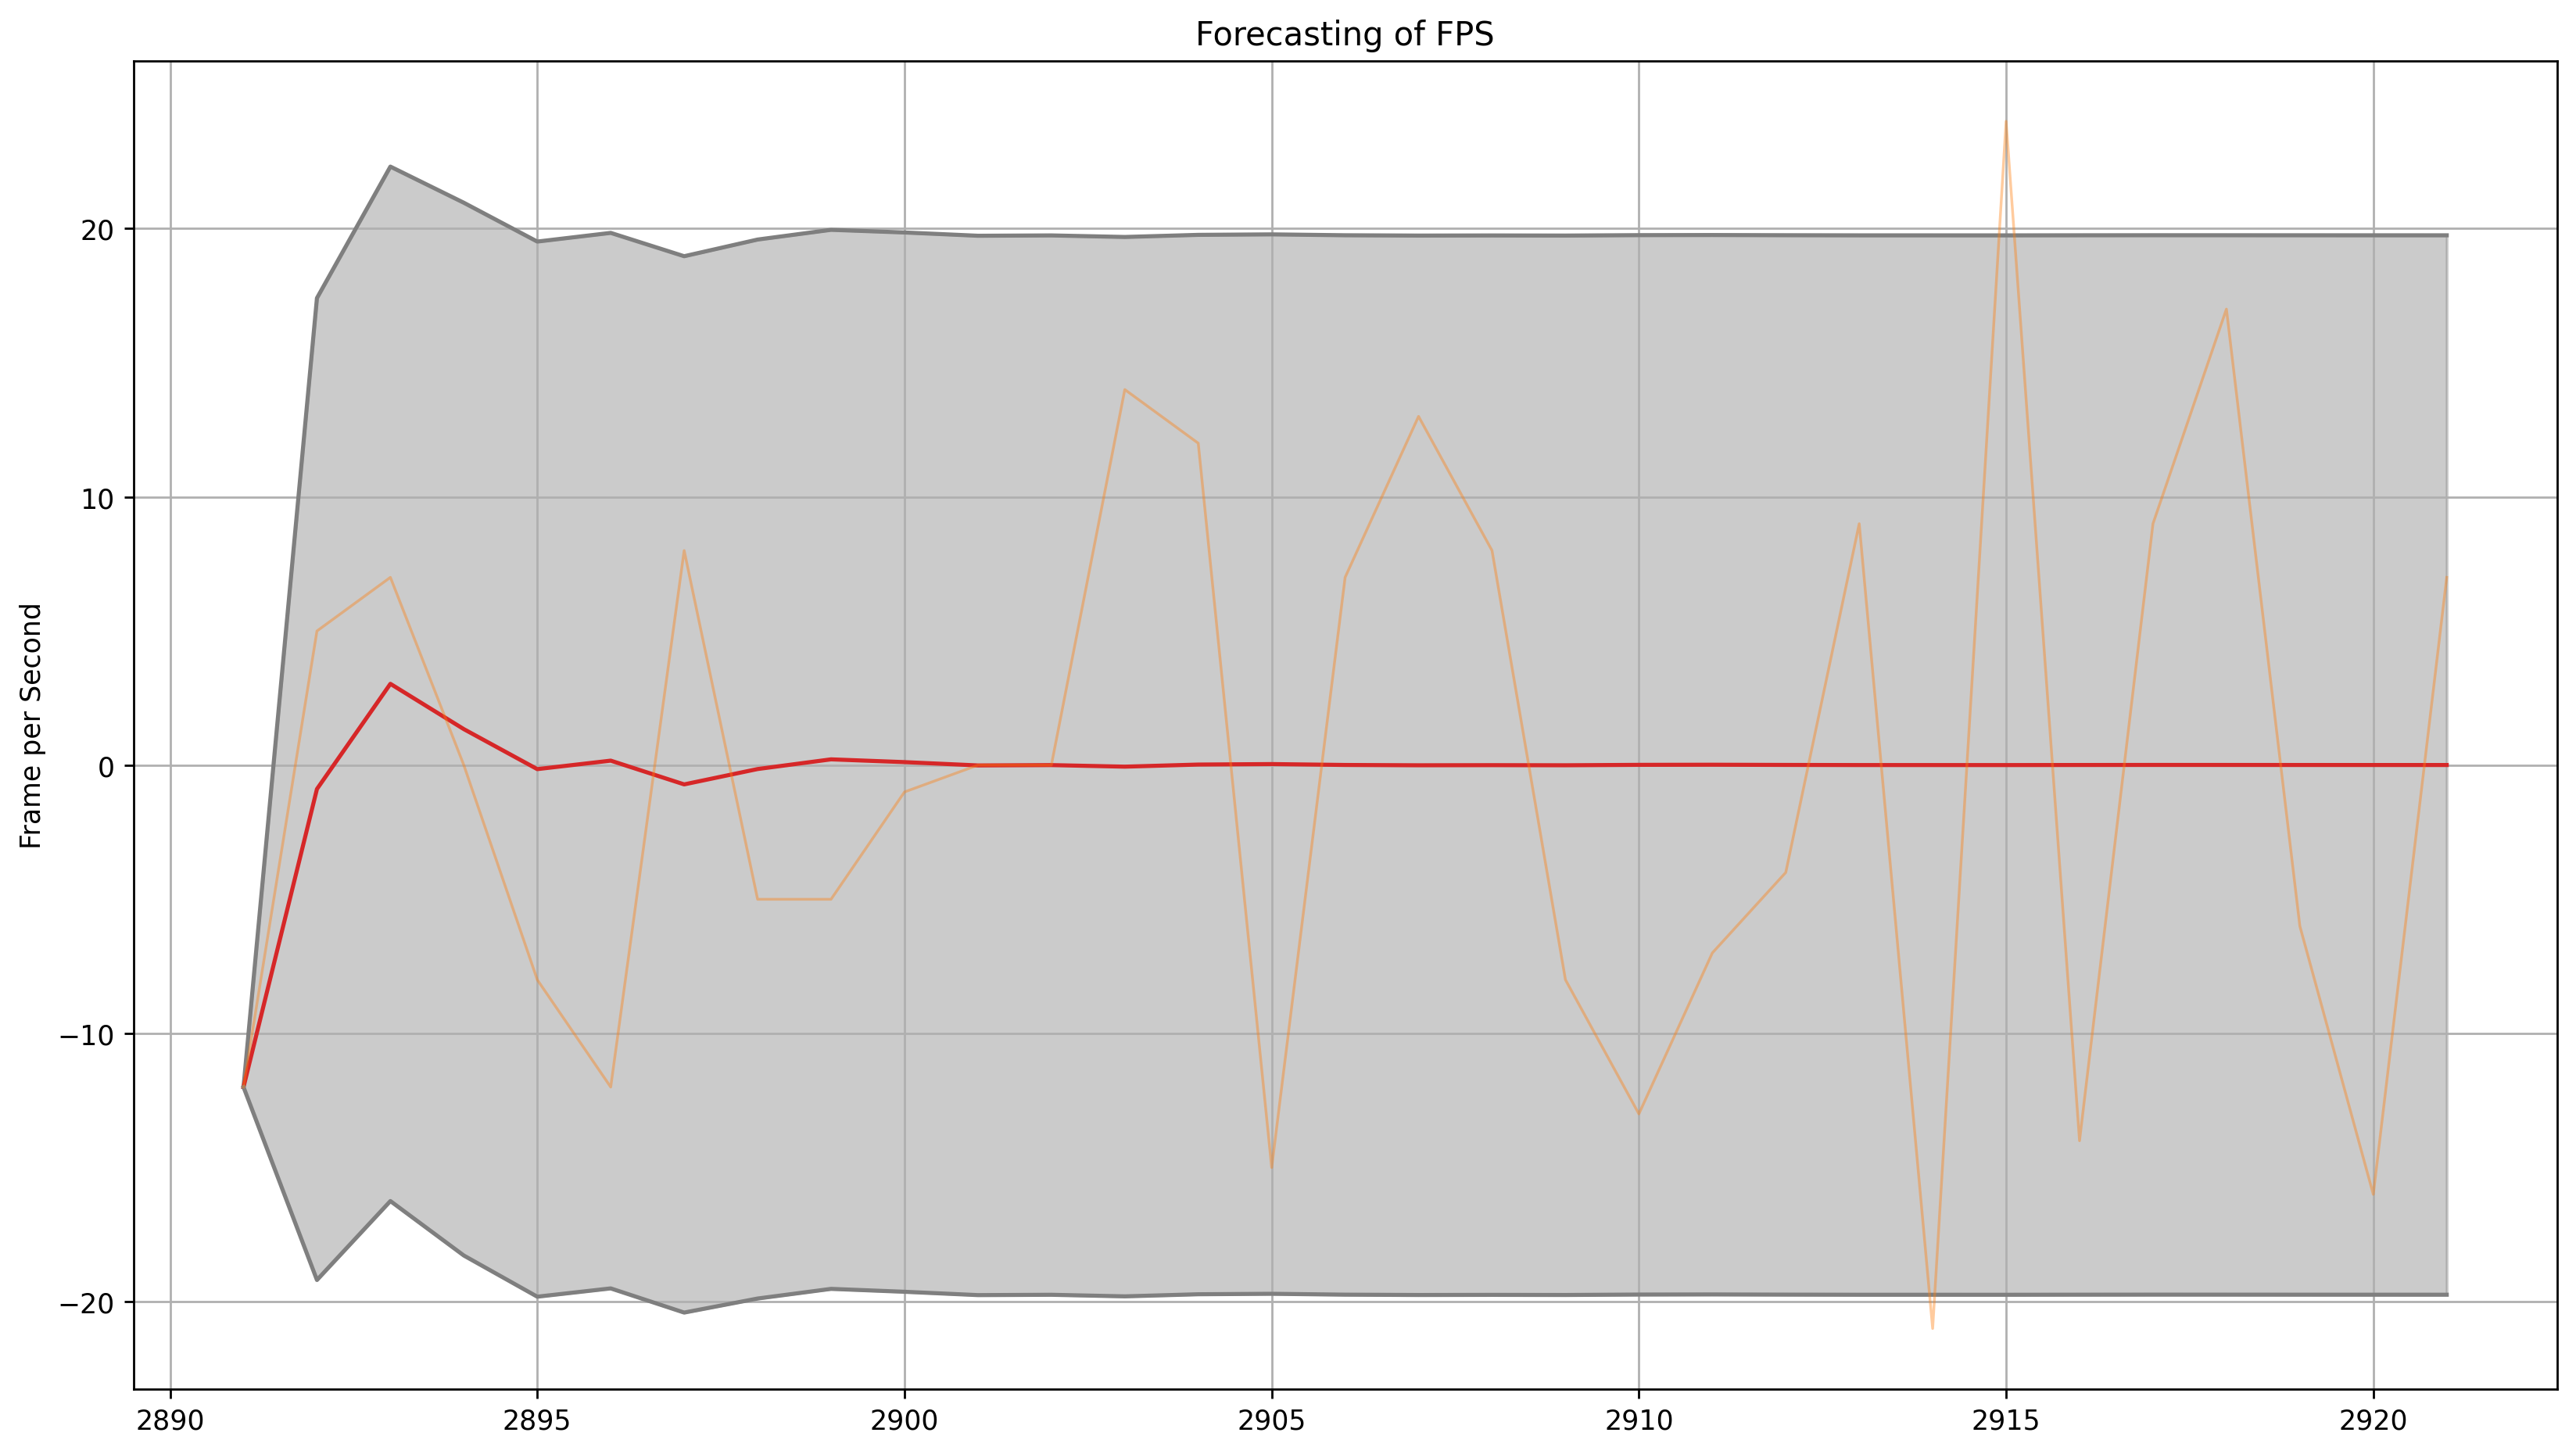

In [31]:
plt.figure(figsize=(16, 9), dpi=250)
# plt.plot(list(range(2892)), horizon_diff_train["FPS"], linewidth=1, c='tab:blue')
# plt.plot(list(range(2891, 3192)), upper:=pd.concat([horizon_diff_train["FPS"], varmax_forecasting.conf_int()["upper FPS"]]).iloc[2891:], c='tab:gray')
# plt.plot(list(range(2891, 3192)), pd.concat([horizon_diff_train["FPS"], varmax_forecasting.predicted_mean["FPS"]]).iloc[2891:], c='tab:red')
# plt.plot(list(range(2891, 3192)), lower:=pd.concat([horizon_diff_train["FPS"], varmax_forecasting.conf_int()["lower FPS"]]).iloc[2891:], c='tab:gray')
# plt.fill_between(list(range(2891, 3192)), upper, lower, color="tab:gray", alpha=0.5)
# plt.plot(list(range(2891, 3192)), horizon_diff_test["FPS"])
# plt.plot(
#     list(range(2891, 3192)), np.hstack((horizon_diff_train["FPS"].to_numpy()[-1], horizon_diff_test["FPS"].to_numpy())),
#     linewidth=1, c='tab:orange', alpha=0.4
# )
plt.plot(list(range(2891, 2922)), upper:=pd.concat([horizon_diff_train["FPS"], varmax_forecasting.conf_int()["upper FPS"]]).iloc[2891:2922], c='tab:gray')
plt.plot(list(range(2891, 2922)), pd.concat([horizon_diff_train["FPS"], varmax_forecasting.predicted_mean["FPS"]]).iloc[2891:2922], c='tab:red')
plt.plot(list(range(2891, 2922)), lower:=pd.concat([horizon_diff_train["FPS"], varmax_forecasting.conf_int()["lower FPS"]]).iloc[2891:2922], c='tab:gray')
plt.fill_between(list(range(2891, 2922)), upper, lower, color="tab:gray", alpha=0.4)
plt.plot(
    list(range(2891, 2922)), np.hstack((horizon_diff_train["FPS"].to_numpy()[-1], horizon_diff_test["FPS"].to_numpy()[:30])),
    linewidth=1, c='tab:orange', alpha=0.4
)
plt.title("Forecasting of FPS")
plt.ylabel("Frame per Second")
plt.grid()
plt.show()

In [32]:
# np.save(".\\forecasting result\\var_5.npy", varmax_forecasting.predicted_mean["FPS"].to_numpy())

## VAR

In [33]:
horizon_train = horizon[:-10]
horizon_test = horizon[-10:]

In [34]:
var_re = VAR(horizon_train)
var_order_result_re = var_re.select_order(12)

In [35]:
var_order_result_re.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [36]:
ic_table_re = pd.read_html(var_order_result.summary().as_html(), header=0, index_col=0)
ic_table_re[0] = ic_table_re[0].replace("\*$", "", regex=True)
ic_table_re[0] = ic_table_re[0].astype("float64")

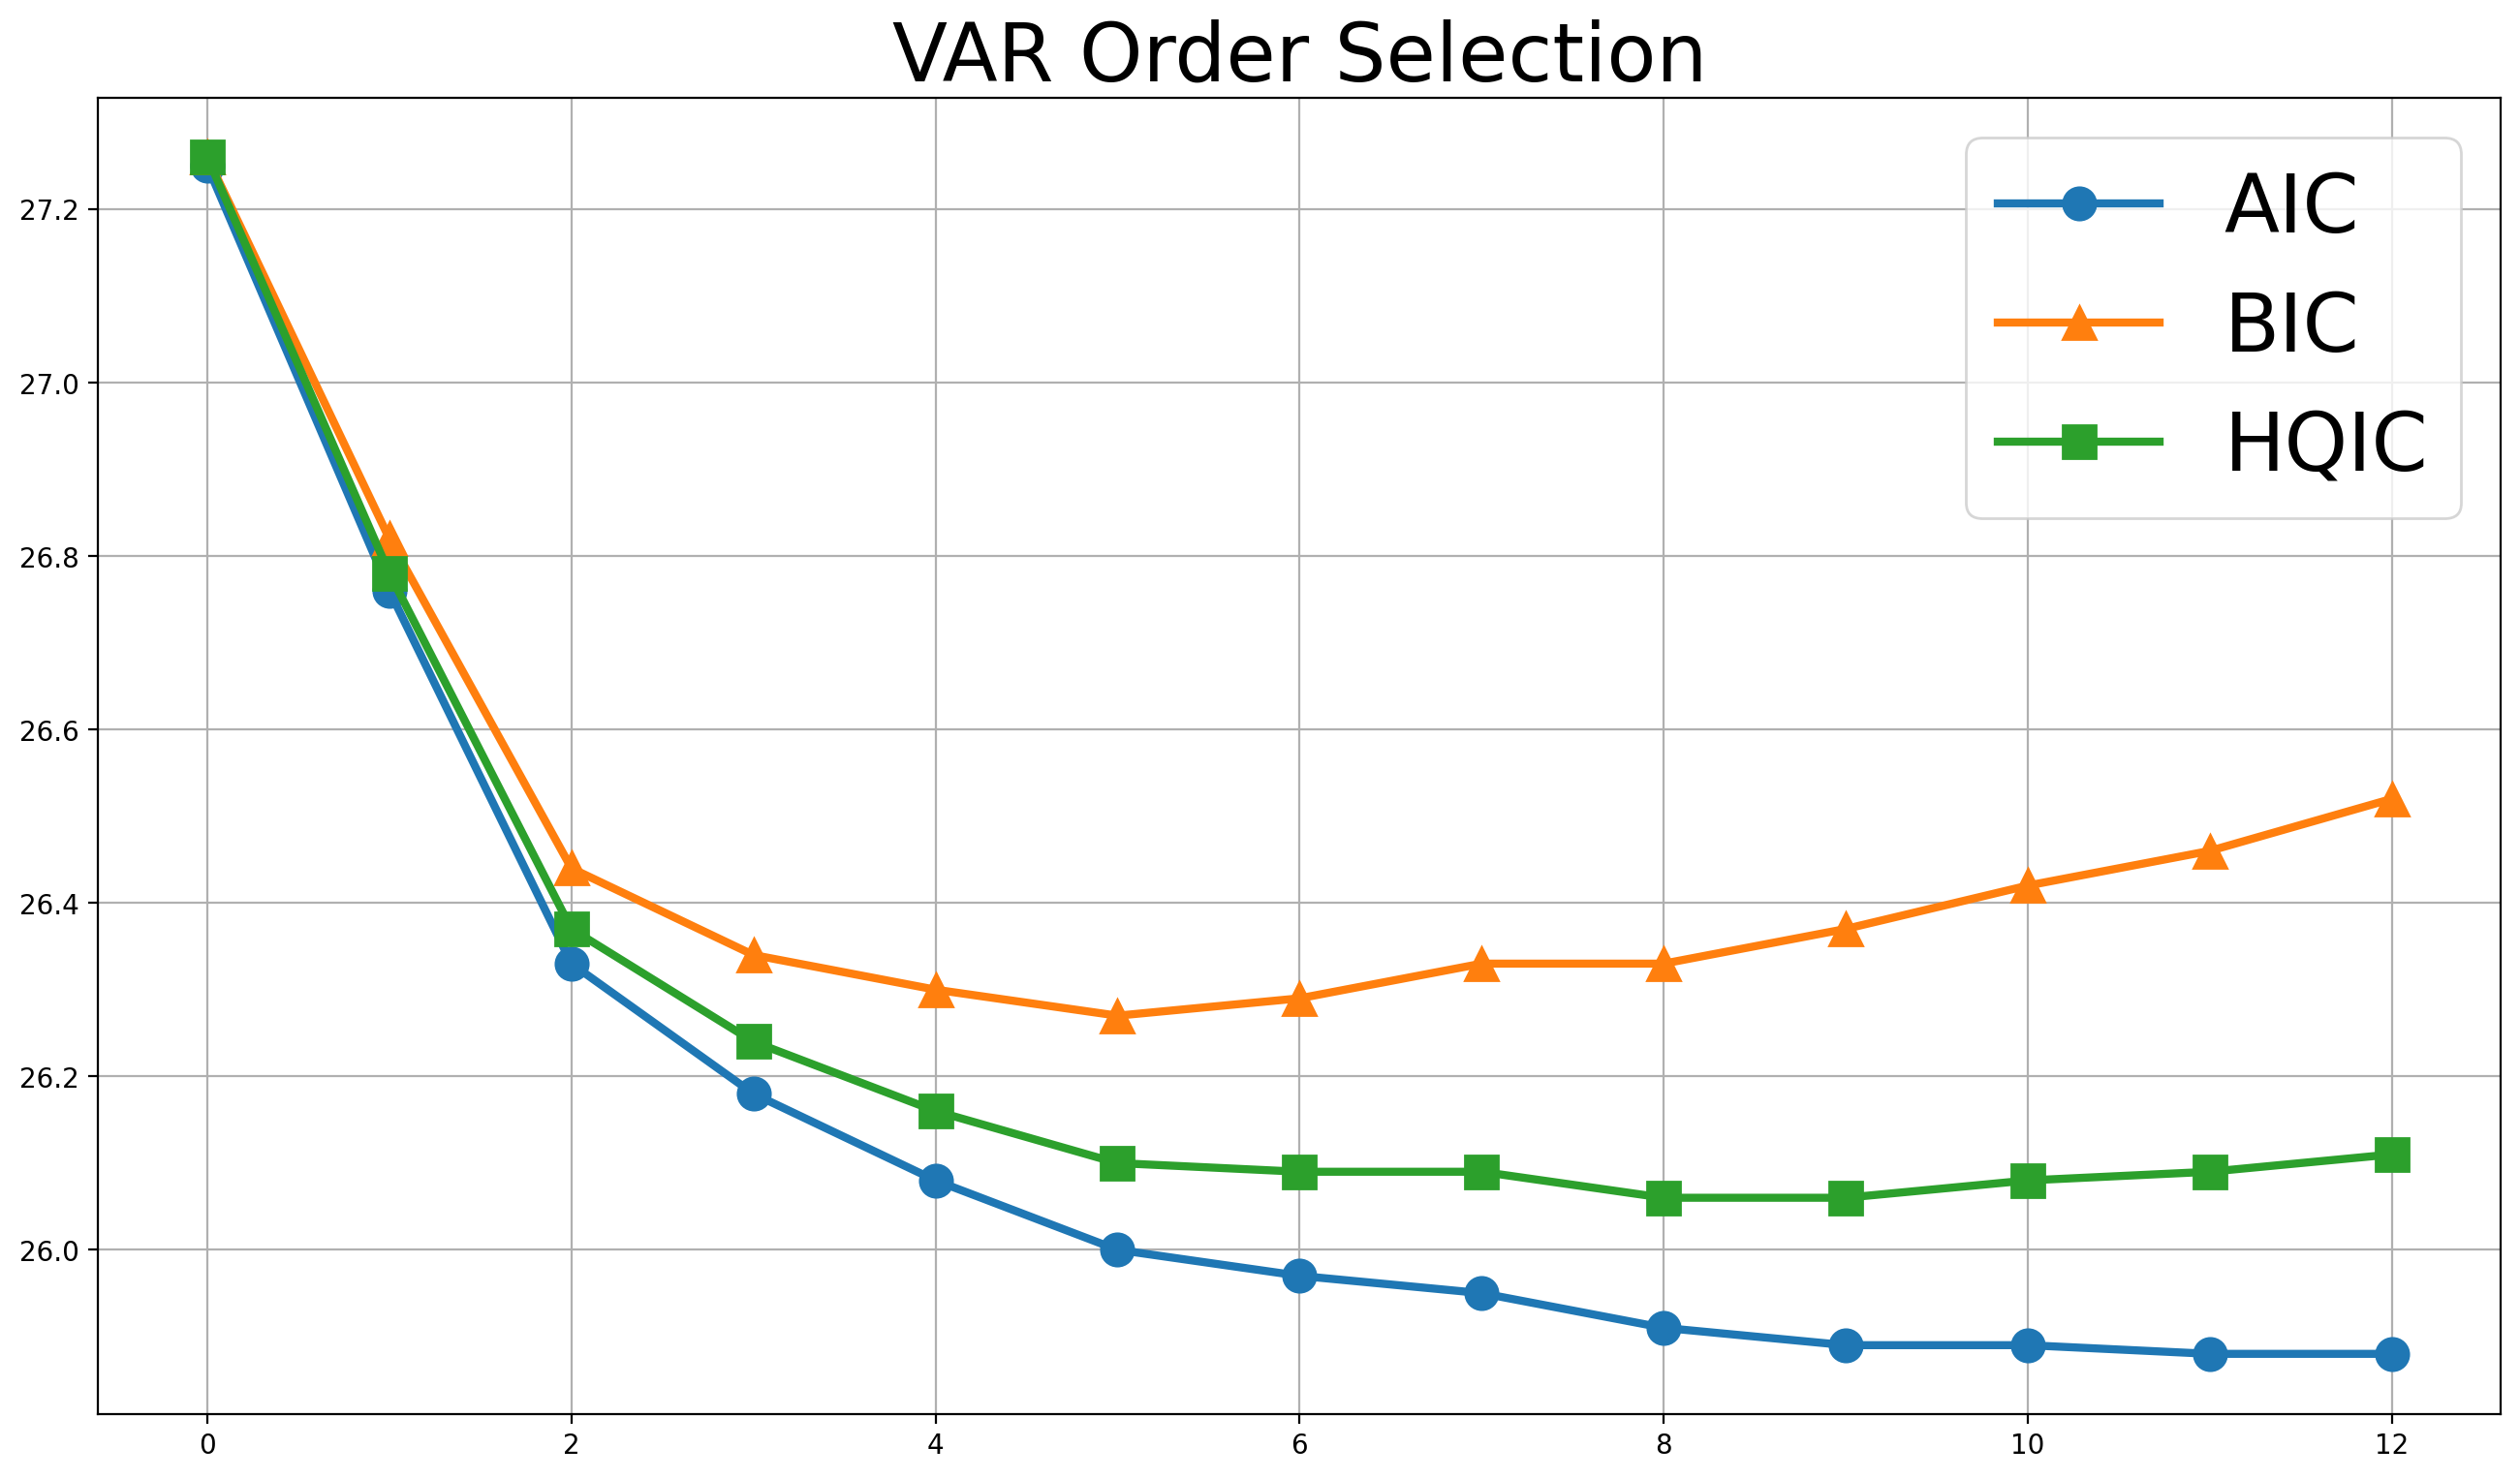

In [37]:
plt.figure(figsize=(16,9), dpi=200)
aic, = plt.plot(ic_table_re[0]["AIC"], "-o", linewidth=3, ms=12, label="AIC")
bic, = plt.plot(ic_table_re[0]["BIC"], "-^", linewidth=3, ms=12, label="BIC")
hqic, = plt.plot(ic_table_re[0]["HQIC"], "-s", linewidth=3, ms=12, label="HQIC")
plt.legend(handles=[aic, bic, hqic], fontsize=30)
plt.title("VAR Order Selection", fontdict={'fontsize':30})
plt.grid()
plt.show()

In [38]:
var_result_re = var_re.fit(3)
print("log likelihood function: ", var_result_re.llf)
print(var_result_re.info_criteria)

log likelihood function:  -64377.26911173694
{'aic': 26.349777631309845, 'bic': 26.502347102398502, 'hqic': 26.404494040681502, 'fpe': 277691898119.3213}


In [39]:
var_result_re.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 10, Jun, 2022
Time:                     23:06:51
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    26.5023
Nobs:                     3180.00    HQIC:                   26.4045
Log likelihood:          -64377.3    FPE:                2.77692e+11
AIC:                      26.3498    Det(Omega_mle):     2.70810e+11
--------------------------------------------------------------------
Results for equation Average Effective Clock
                                      coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------
const                                 1145.331364       126.197281            9.076           0.000
L1.Average Effective Clock               0.802106         0.052626

In [40]:
irf_var_re = var_result_re.irf(periods=10)

In [41]:
# irf_var_re.plot(impulse="FPS")
# plt.show()

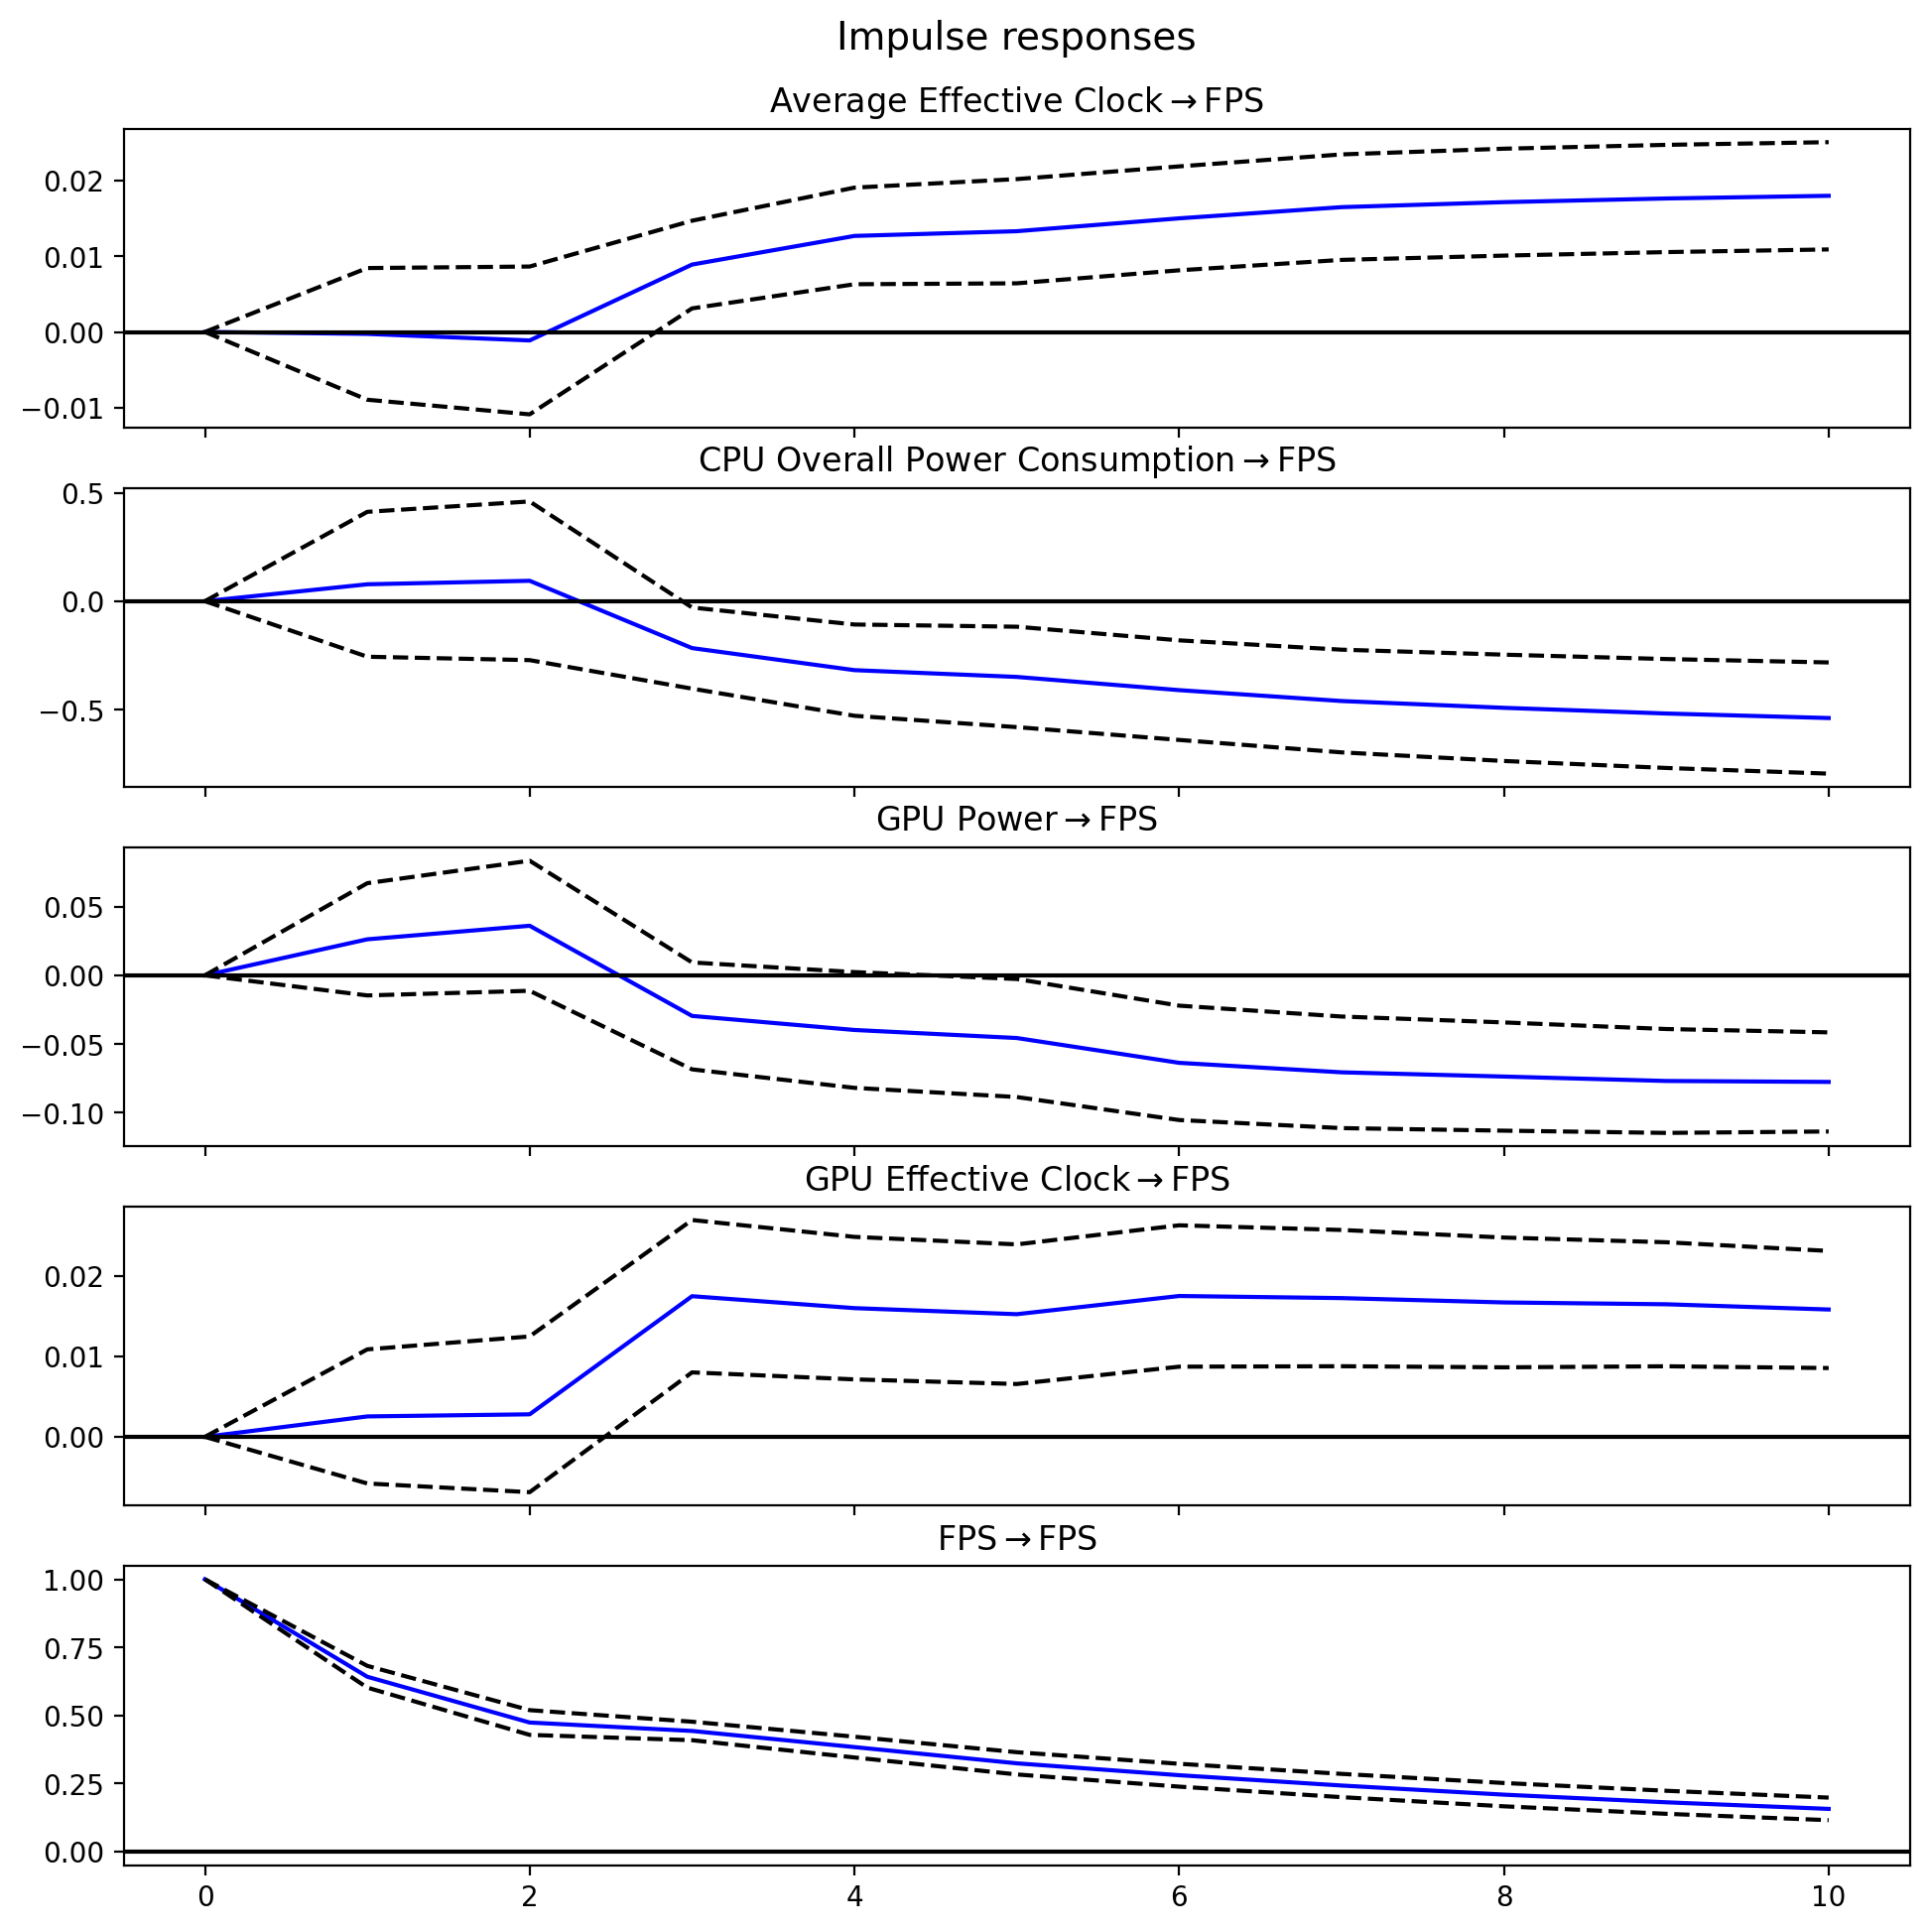

In [42]:
irf_var_re.plot(response="FPS")
plt.show()

Portmanteau Test

In [43]:
var_result_re.test_whiteness().summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Jarque-Bera Test

In [44]:
var_result_re.test_normality().summary()

<class 'statsmodels.iolib.table.SimpleTable'>

格蘭傑因果關係檢定

In [45]:
var_result_re.test_causality(
    "FPS",
    ["Average Effective Clock", "CPU Overall Power Consumption",
     "GPU Power", "GPU Effective Clock"],
    kind='f'
).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [46]:
var_result_re.test_causality(
    "FPS",
    ["CPU Overall Power Consumption", "GPU Power"],
    kind='f'
).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

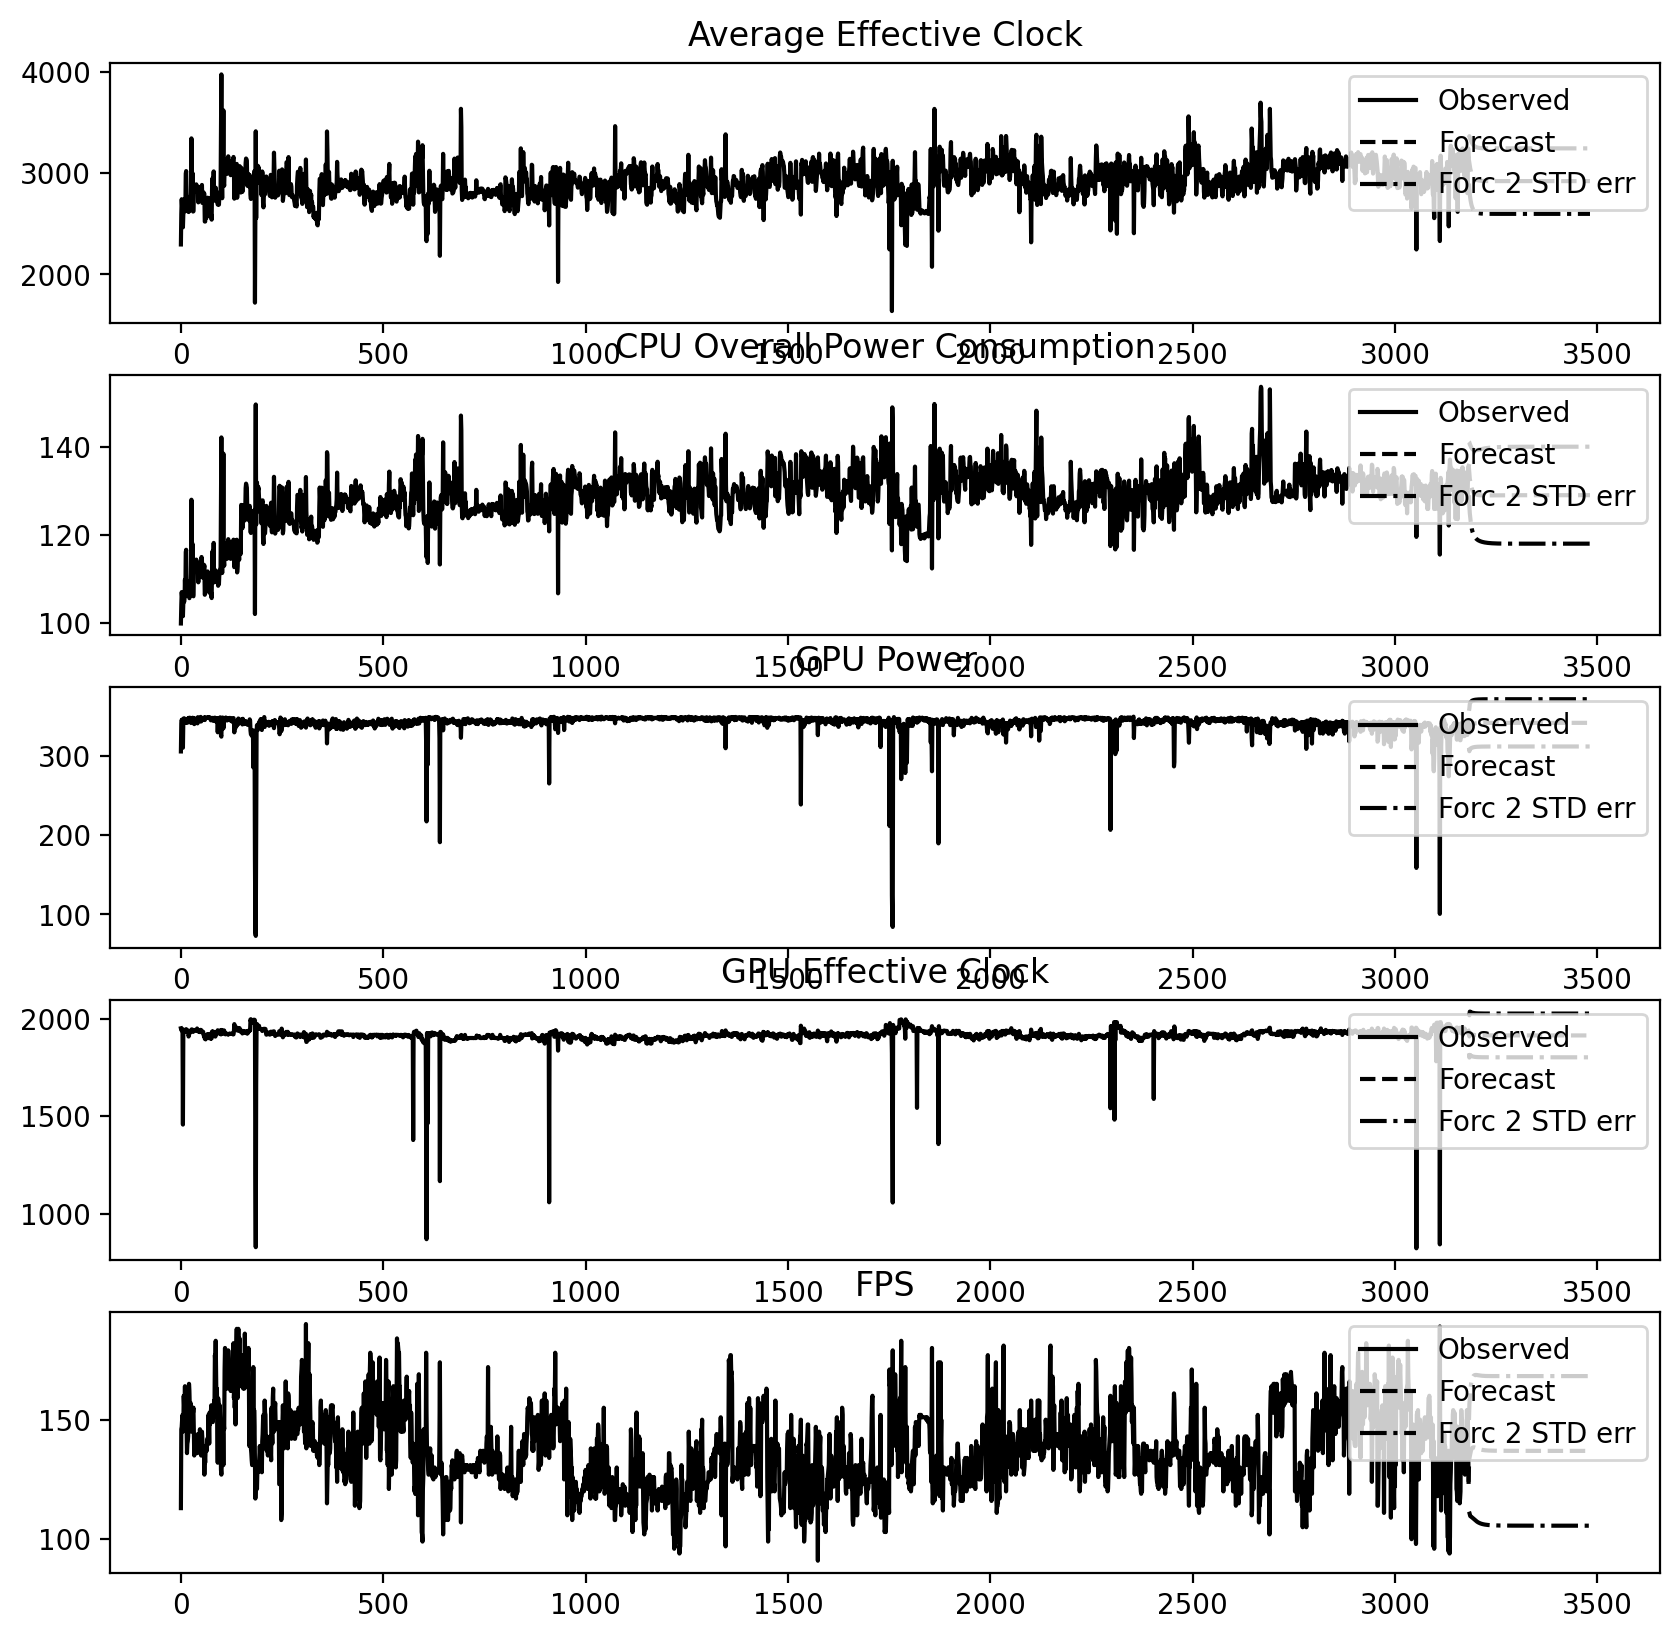

In [47]:
fig = var_result_re.plot_forecast(steps=300)
fig.dpi = 200
plt.show()

### VARMAX

In [48]:
# model_result30 = VARMAX(horizon_train, order=(3, 0)).fit()
# model_result30.save(f".\\weights\\VAR 5\\VAR_result_30.pickle")

In [50]:
varmax_result_re = load_pickle(".\\weights\\VAR 5\\VAR_result_30.pickle")
# varmax.summary()

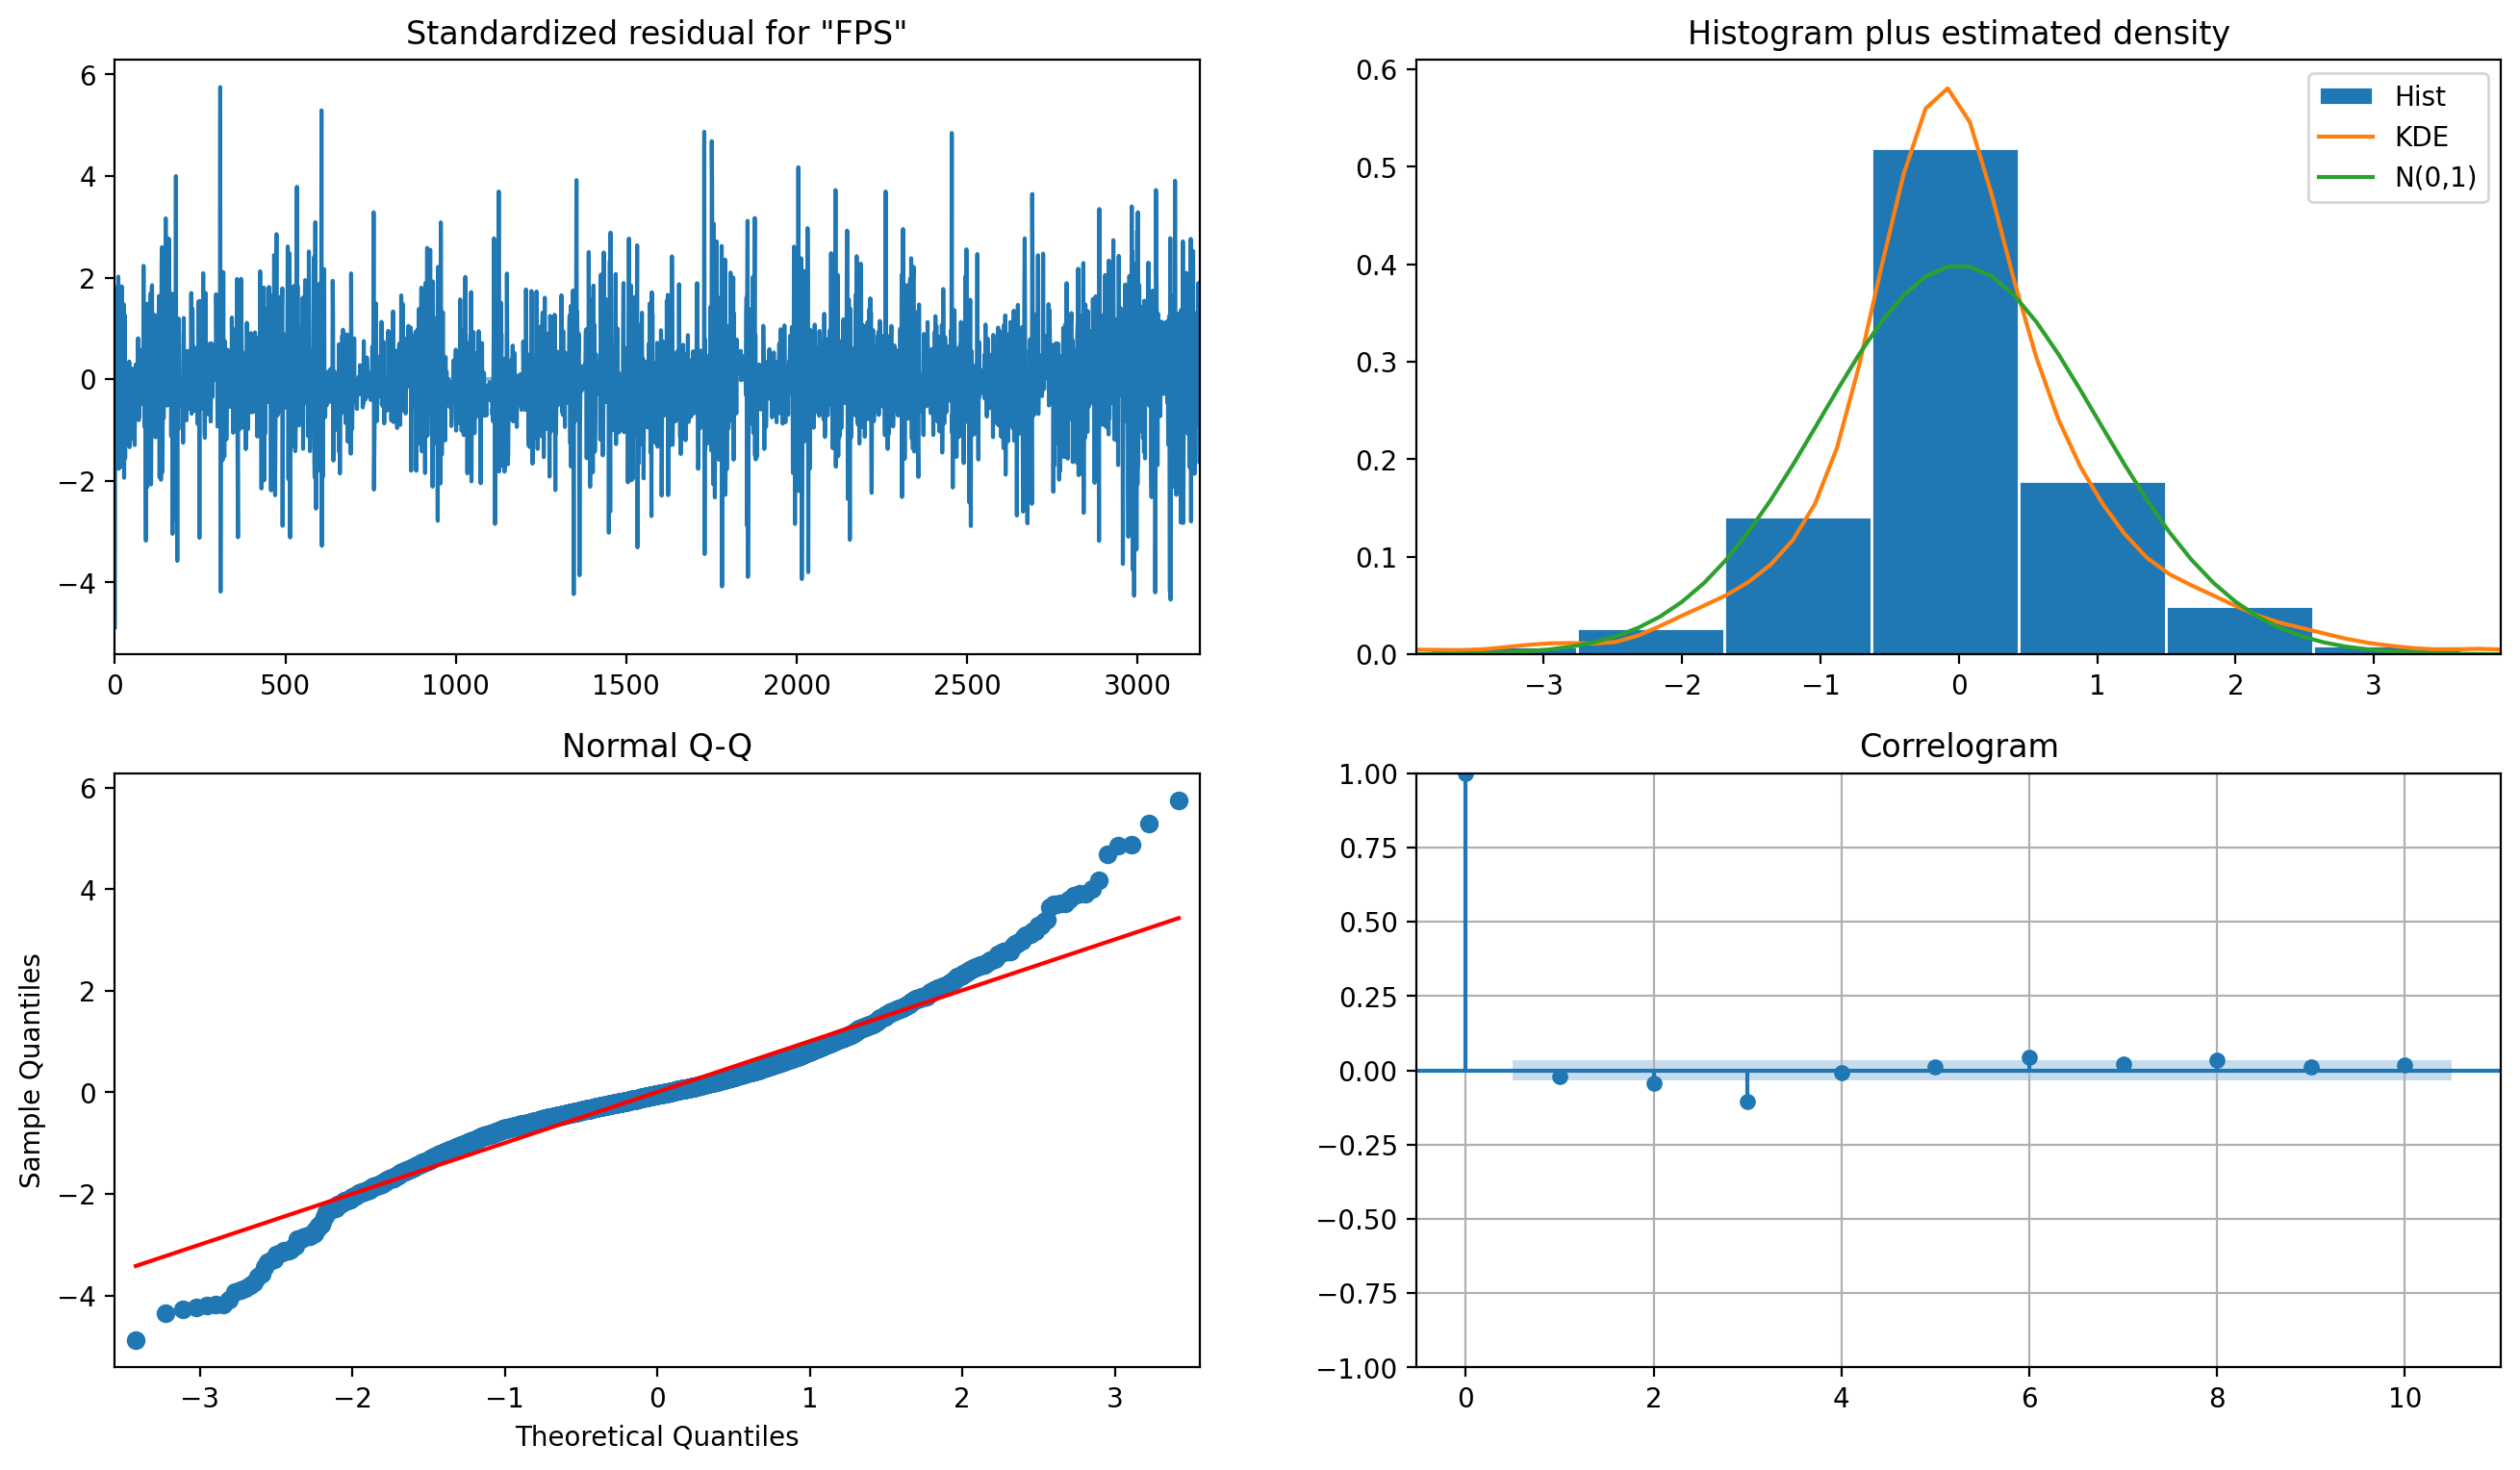

In [51]:
varmax_result_re.plot_diagnostics(variable=4, fig=plt.figure(figsize=(16,9), dpi=200))
plt.grid()
plt.show()

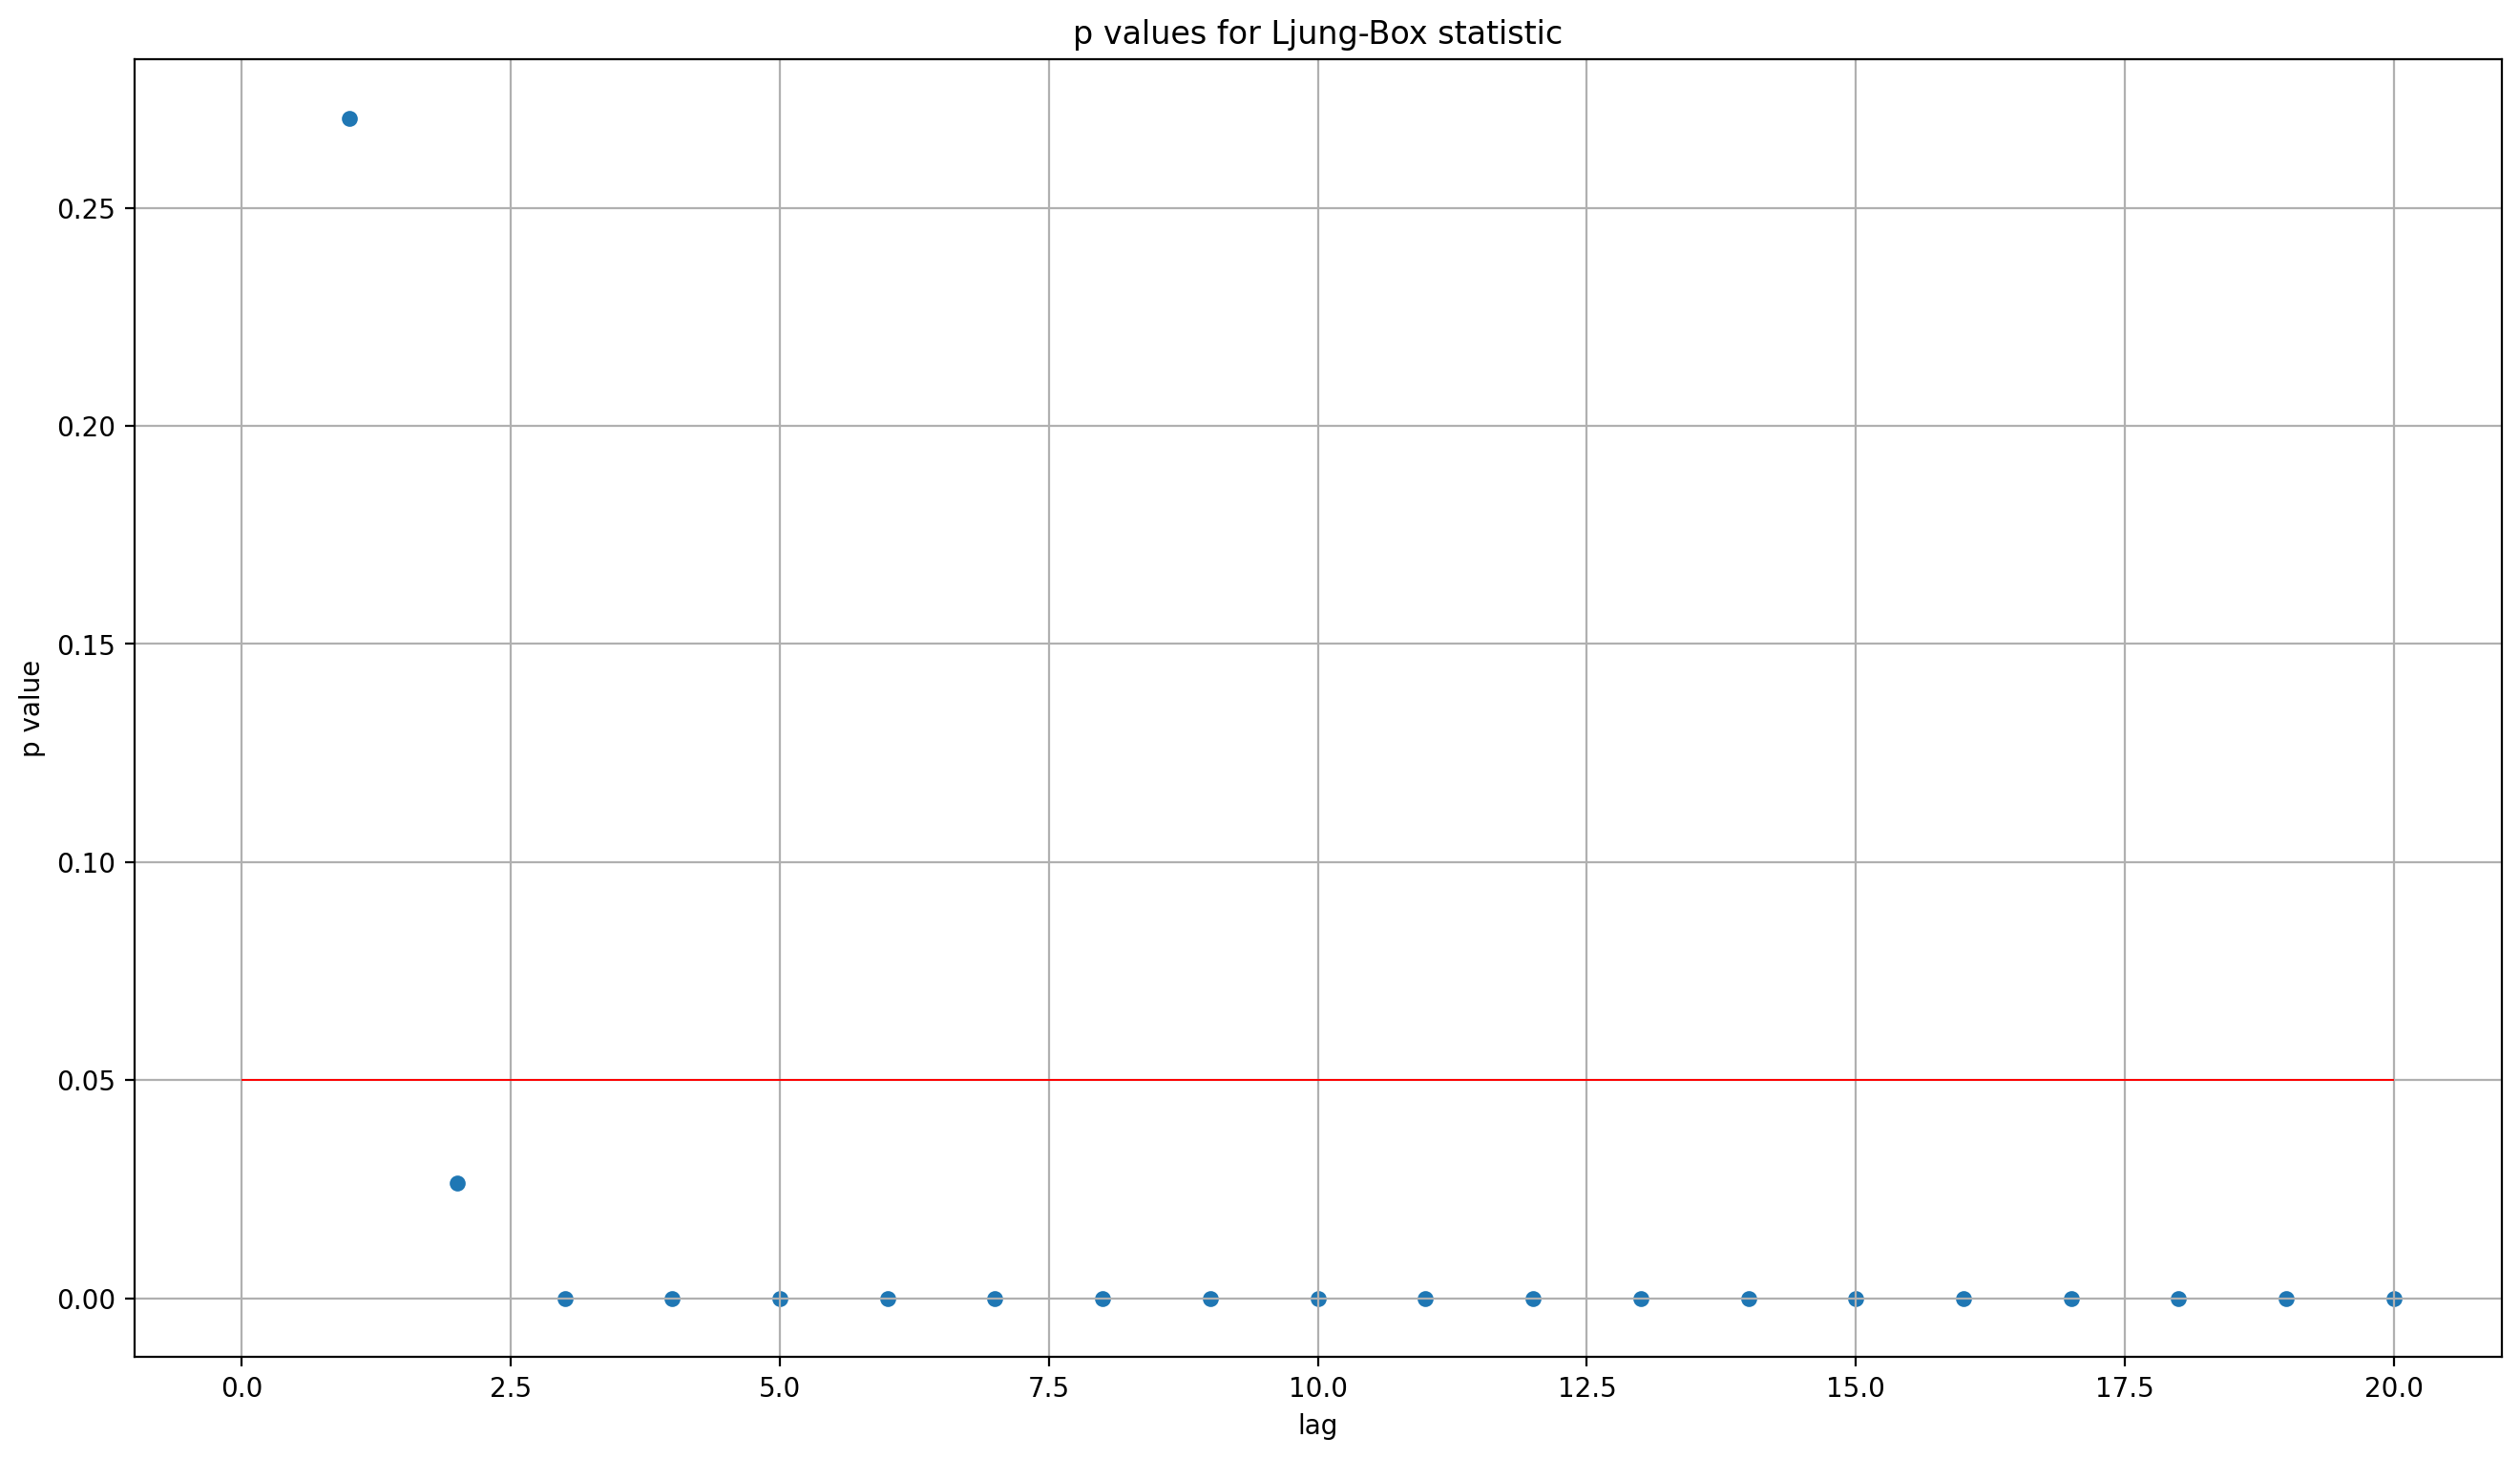

In [52]:
plt.figure(figsize=(16, 9), dpi=200)
plt.scatter(list(range(1,21)), varmax_result_re.test_serial_correlation(method="ljungbox", lags=20)[4, 1, :], s=25)
plt.hlines(y=[0.05], xmin=0, xmax=20, colors="r", linewidths=0.7)
plt.title("p values for Ljung-Box statistic")
plt.xlabel("lag")
plt.ylabel("p value")
plt.grid()
plt.show()

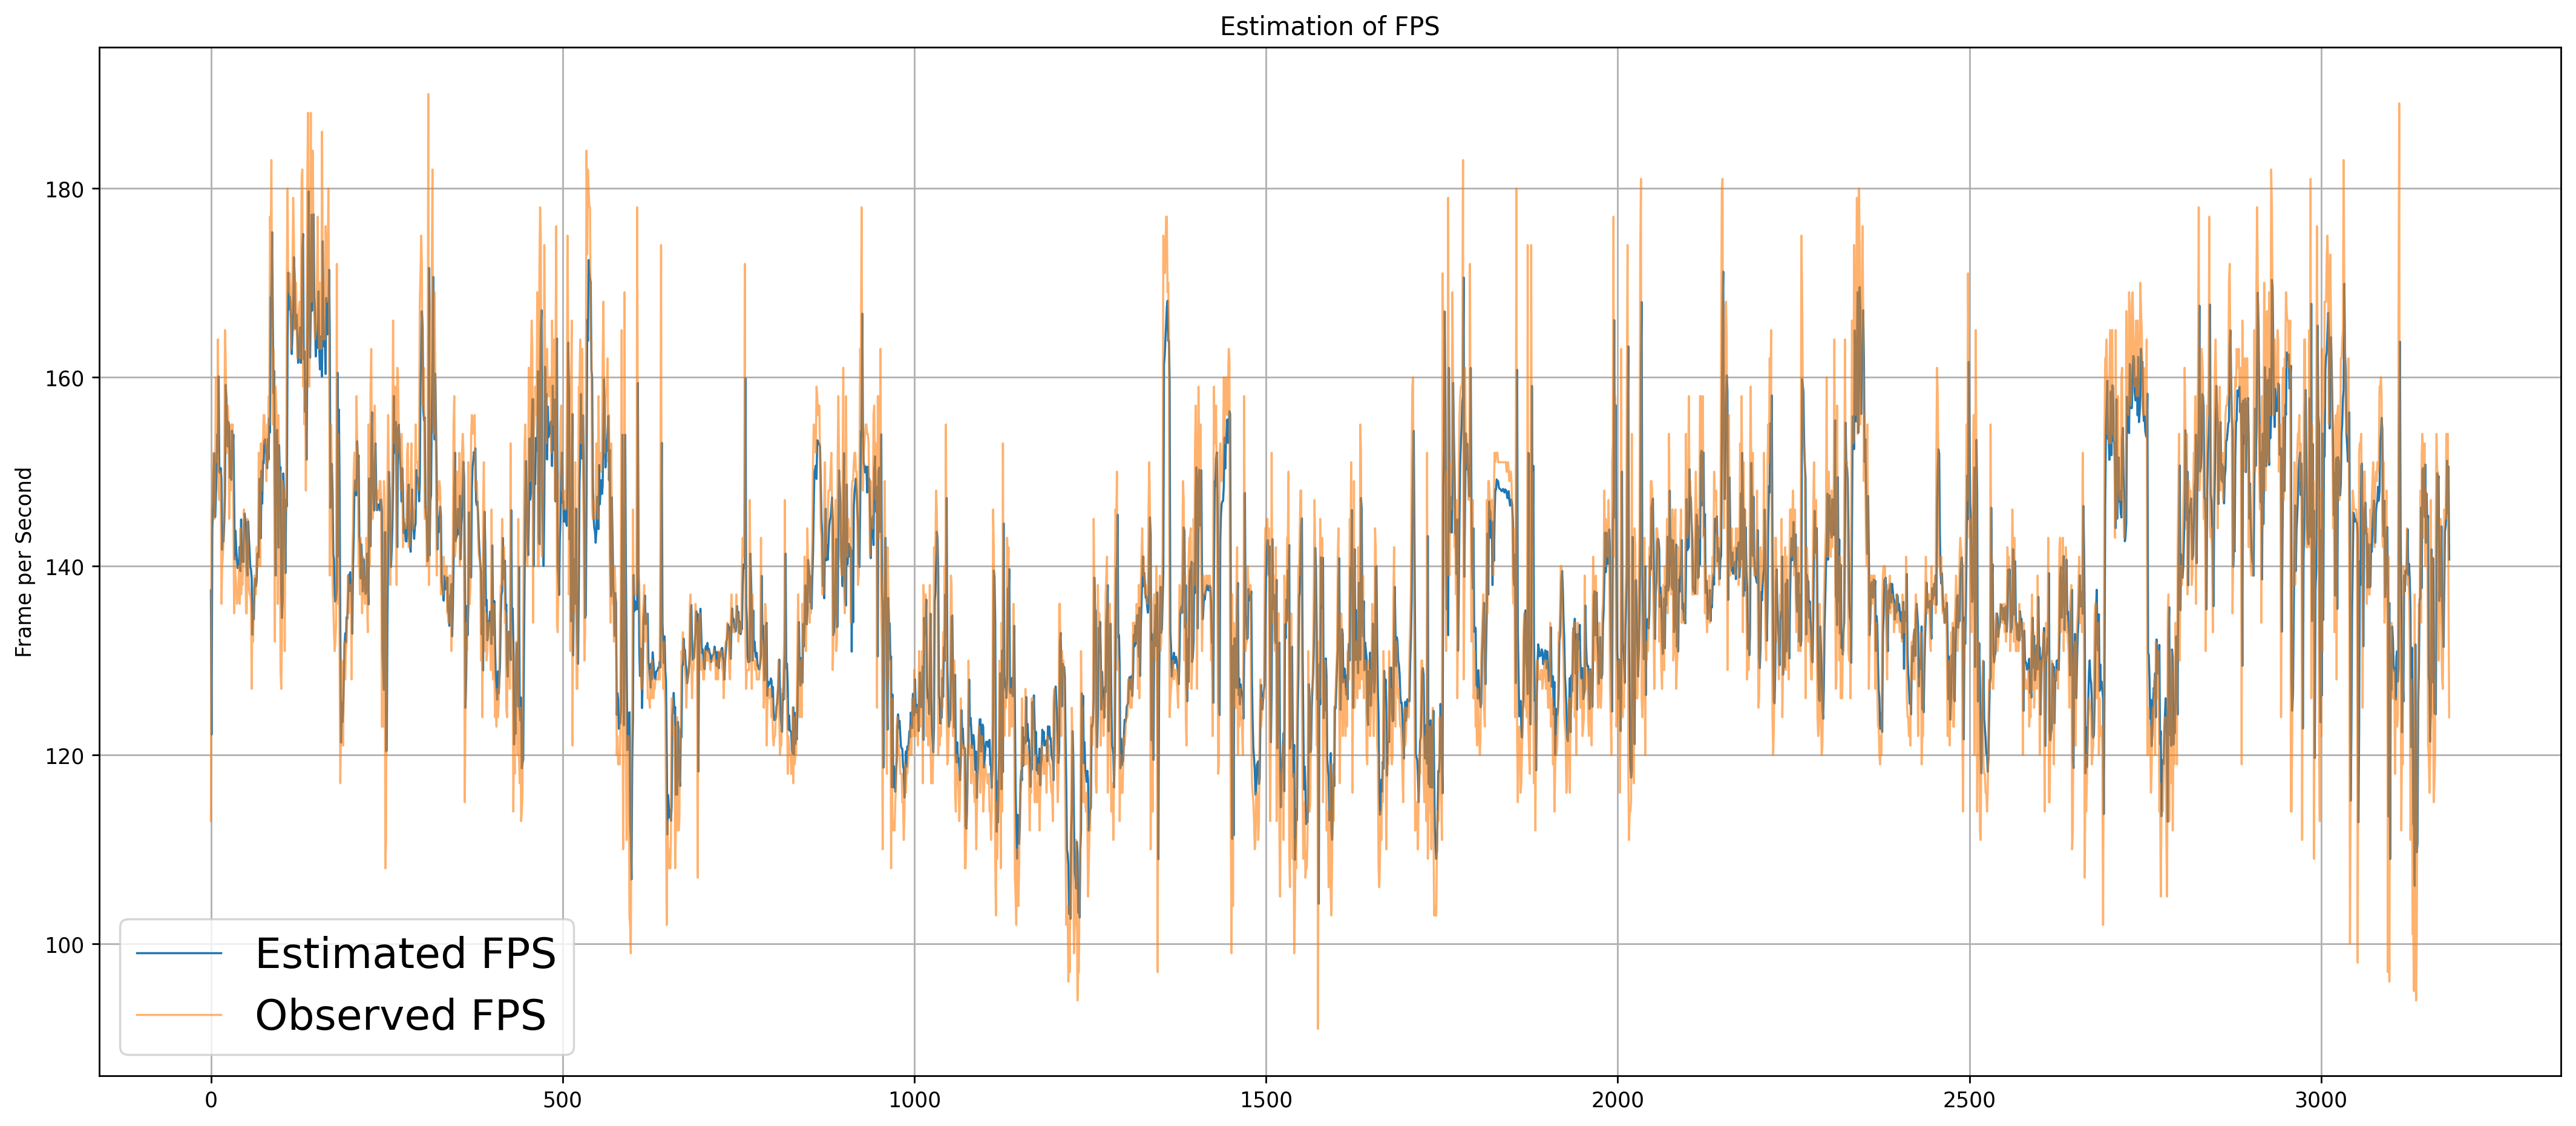

In [53]:
hat_FPS = varmax_result_re.predict().to_numpy()[:, 4]
plt.figure(figsize=(21, 9), dpi=250)
ts1, = plt.plot(hat_FPS, linewidth=1, label="Estimated FPS", c='tab:blue')
ts2, = plt.plot(horizon_train["FPS"], linewidth=1, label="Observed FPS", c='tab:orange', alpha=0.6)
plt.legend(handles=[ts1, ts2], fontsize=20)
plt.title("Estimation of FPS")
plt.ylabel("Frame per Second")
plt.grid()
plt.show()

In [54]:
varmax_forecasting_re = varmax_result_re.get_forecast(steps=300)

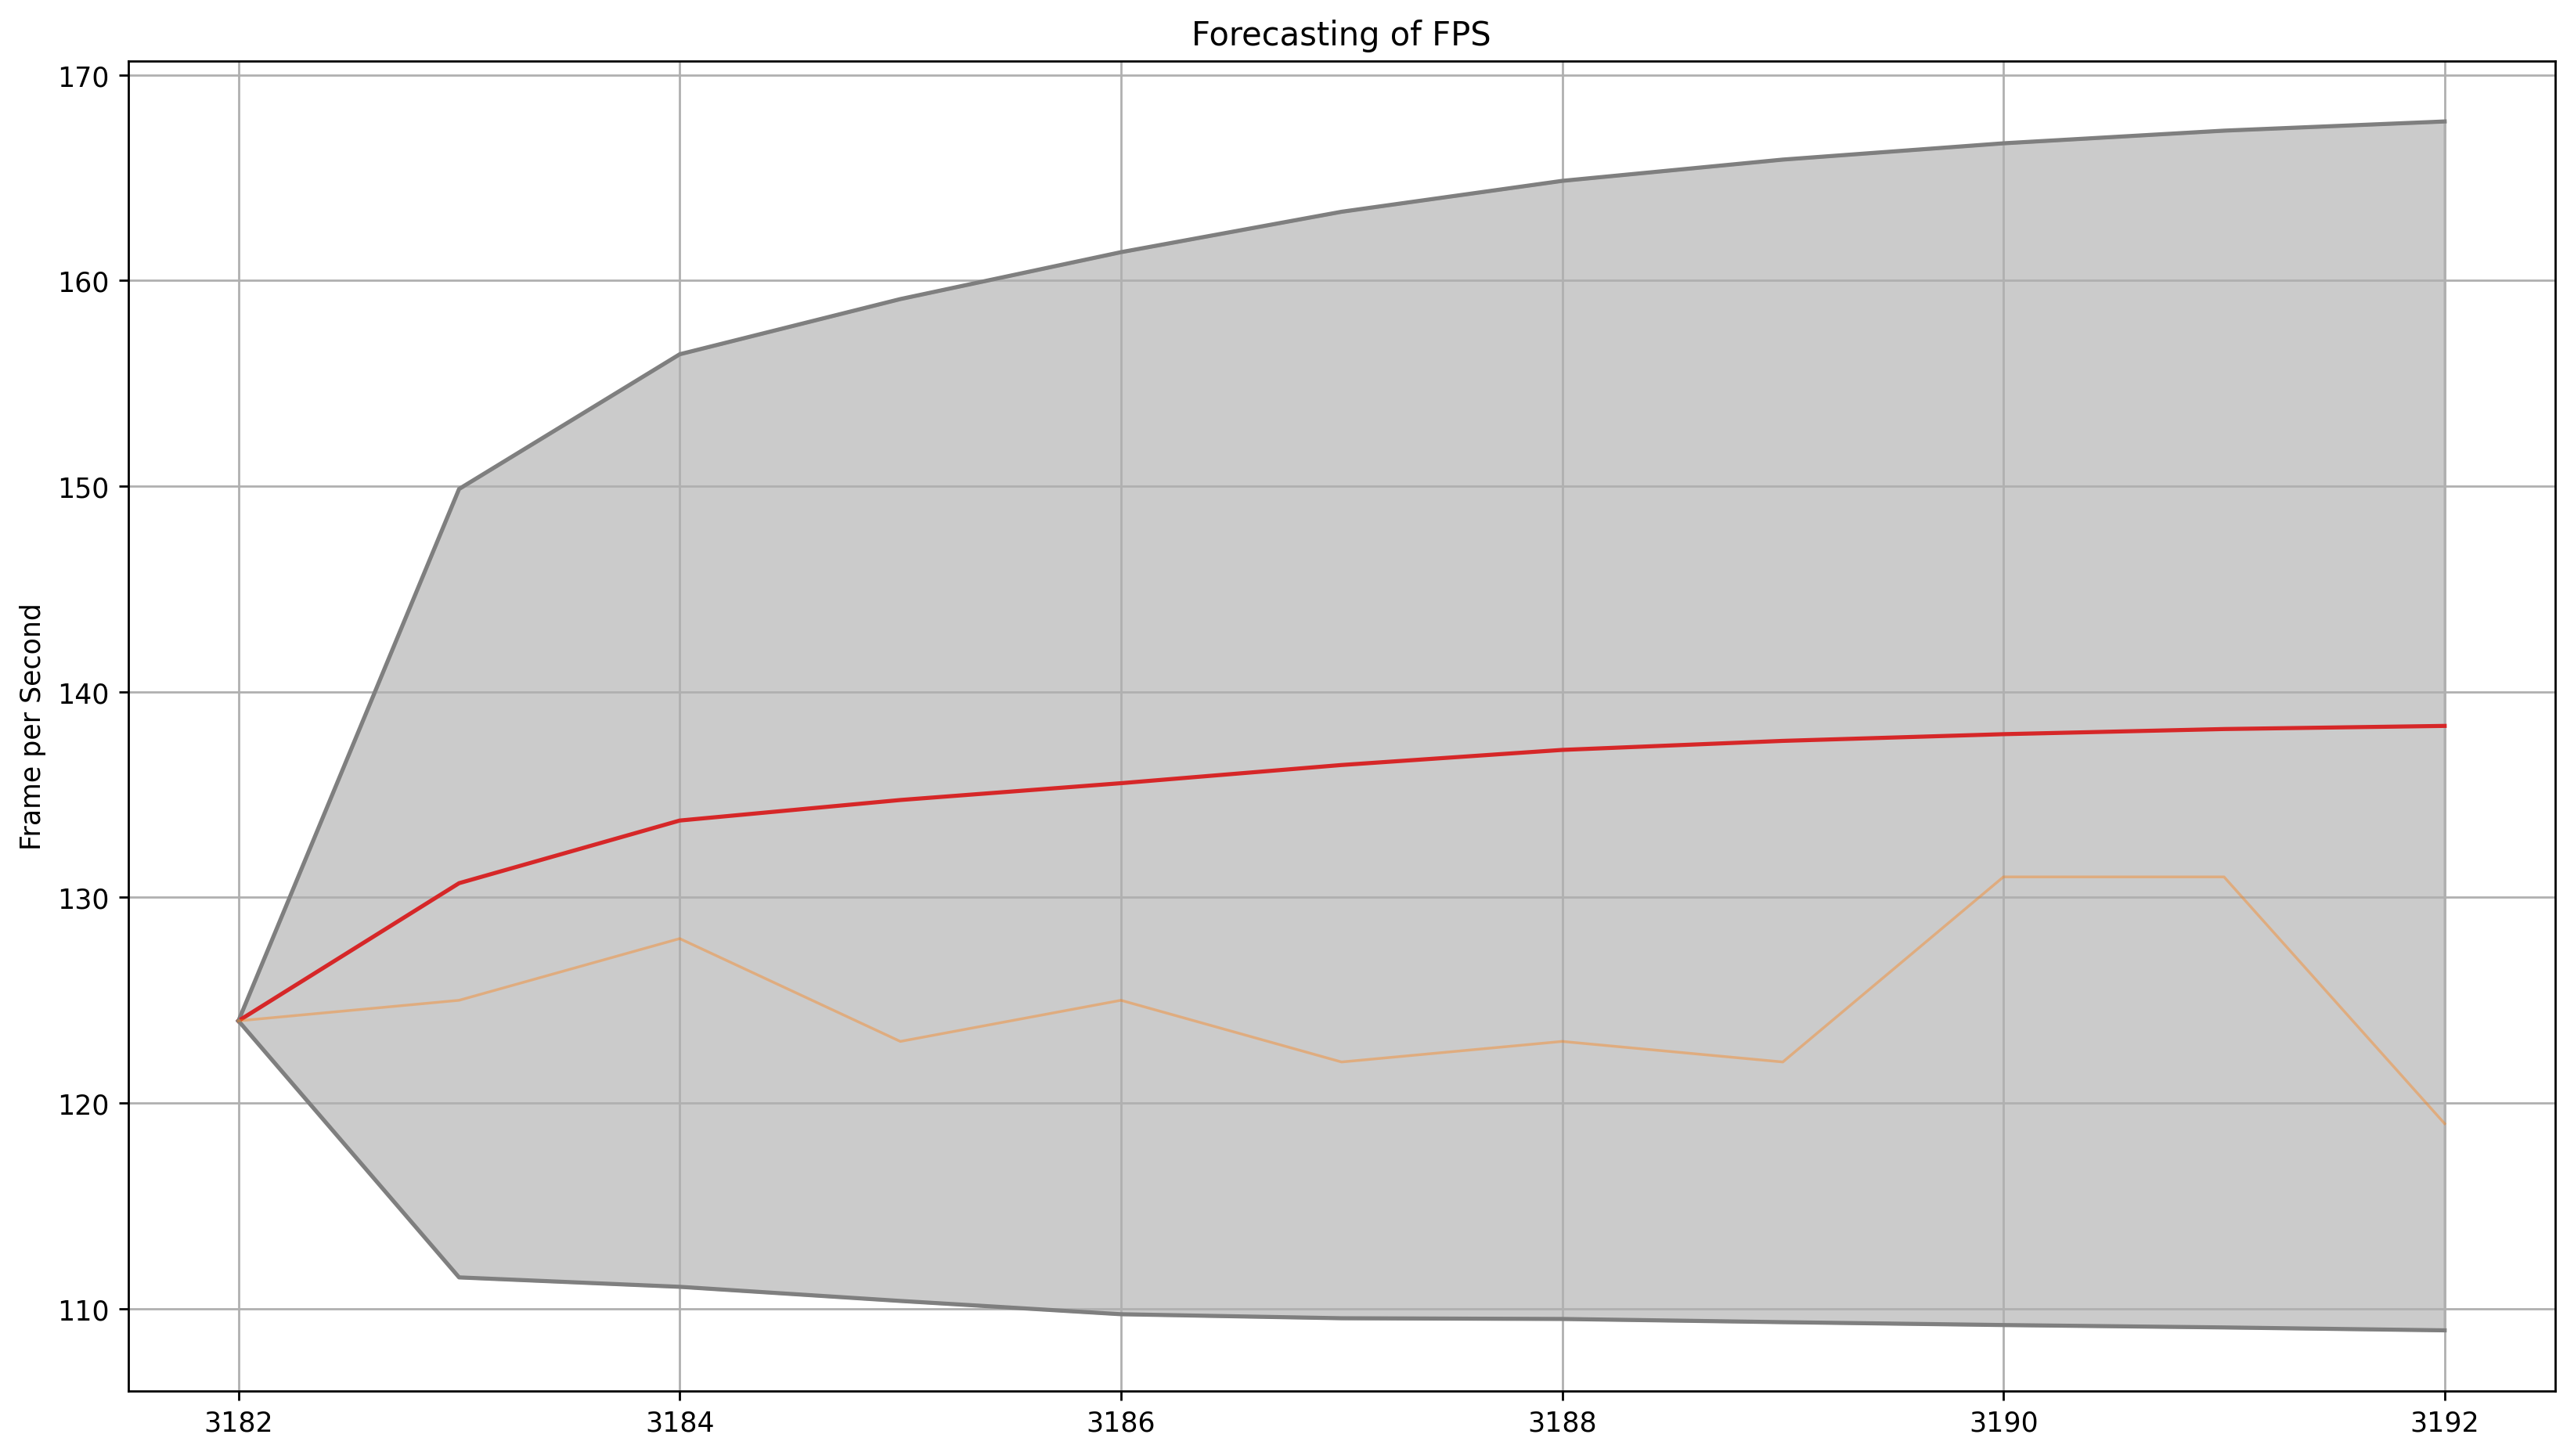

In [56]:
plt.figure(figsize=(16, 9), dpi=250)
plt.plot(list(range(3182, 3193)), upper:=pd.concat([horizon_train["FPS"], varmax_forecasting_re.conf_int()["upper FPS"]]).iloc[3182:3193], c='tab:gray')
plt.plot(list(range(3182, 3193)), pd.concat([horizon_train["FPS"], varmax_forecasting_re.predicted_mean["FPS"]]).iloc[3182:3193], c='tab:red')
plt.plot(list(range(3182, 3193)), lower:=pd.concat([horizon_train["FPS"], varmax_forecasting_re.conf_int()["lower FPS"]]).iloc[3182:3193], c='tab:gray')
plt.fill_between(list(range(3182, 3193)), upper, lower, color="tab:gray", alpha=0.4)
plt.plot(
    list(range(3182, 3193)), np.hstack((horizon_train["FPS"].to_numpy()[-1], horizon_test["FPS"].to_numpy())),
    linewidth=1, c='tab:orange', alpha=0.4
)
plt.title("Forecasting of FPS")
plt.ylabel("Frame per Second")
plt.grid()
plt.show()